# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
#Packages to analyse and manipulate data
import numpy as np
import pandas as pd

#Packages to visualise data
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import missingno as msno
from statsmodels.graphics.correlation import plot_corr
from sklearn.tree import plot_tree

#Packages to run data imputation on null values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Packages for feature selection
from sklearn.feature_selection import VarianceThreshold
from statsmodels.formula.api import ols
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

#Data Scaling modules
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 

#Packages to split the data for testing and training
from sklearn.model_selection import train_test_split 

#Modelling packages
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor

#Model evaluation packages
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score



<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
#unnamed column dropped
df = pd.read_csv('df_train.csv', index_col=0) 

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [4]:
# Check for information
pd.set_option('display.max_columns', None)
df.head(4)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.0,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667


In [5]:
df['time'].tail(1)

8762    2017-12-31 21:00:00
Name: time, dtype: object

From the table above, our train data falls under the time series data category. The observations were taken between the years 2015 - 2017 in a three hour interval.

The weather observations were taken in five cities in Spain: 
- Madrid 
- Bilbao 
- Barcelona 
- Seville
- Valencia

There are zero values in the rain, snow and clouds features. Indicating that there were times in the 3 hour interval that these features were not observed.


In [6]:
# look at data statistics
df.shape

(8763, 48)

The data has 48 columns and 8,763 observations

In [7]:
#Check for missing values
df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

We can see they are 2068 null values in the Valencia Pressure column, which will be filled with the mean in the Feature Engineering Section.

<AxesSubplot:>

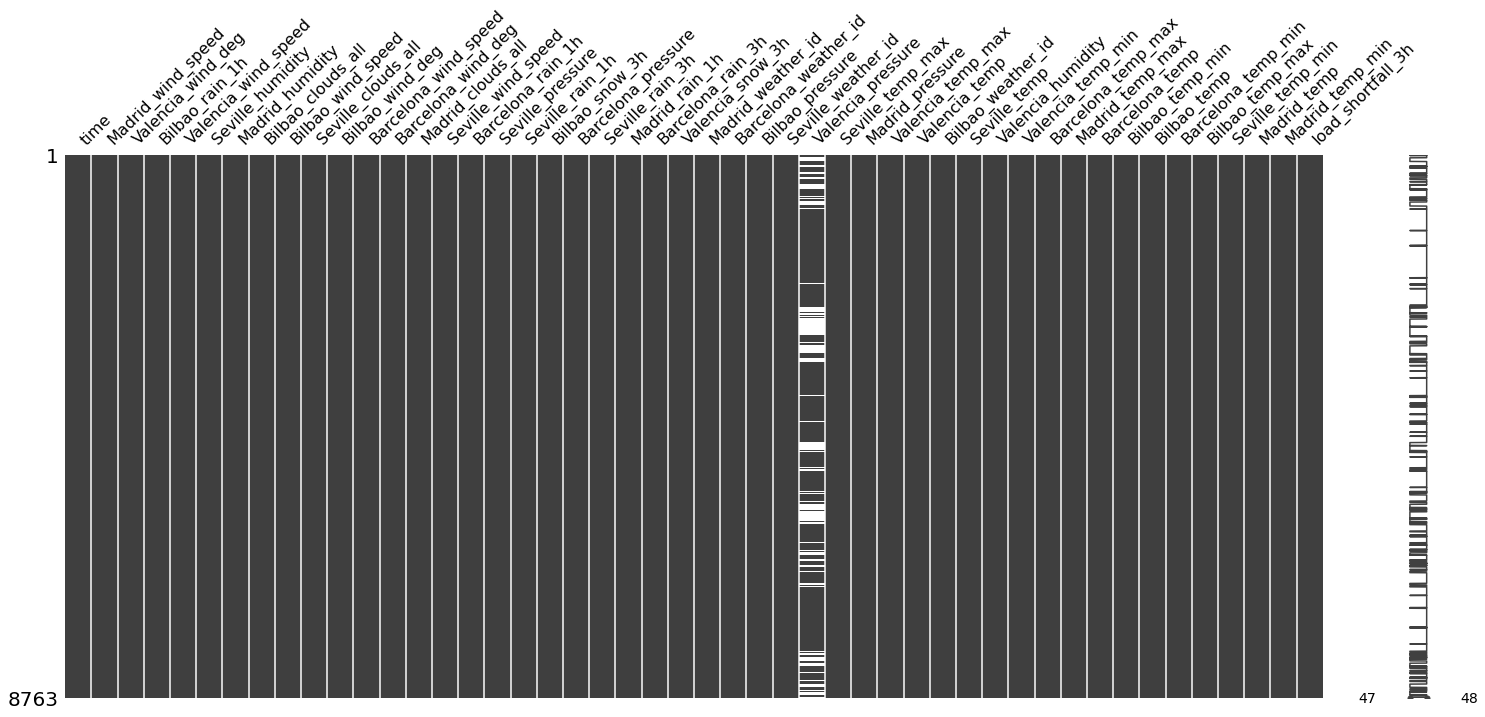

In [8]:
import missingno as msno
msno.matrix(df)

_The above helps visualize the missing values. The white portions on valencia_pressure shows the distribution of the missing values_

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

_From the data set, we have both categorical and numerical data present_

|S/N | Numerical | Categorical |
| :- | -: | :- | 
| 1 | Madrid_wind_speed | time |
| 2 | Bilbao_rain_1h | Valencia_wind_deg |
| 3 | Valencia_wind_speed | Seville_pressure |
| 4 | Bilbao_clouds_all |  |
| 5 | Madrid_humidity|  |
| 6 | Bilbao_clouds_all |  |
| 7 | Bilbao_wind_speed |  |
| 8 | Seville_clouds_all |  |
| 9 | Bilbao_wind_deg |  |
| 10 | Barcelona_wind_speed |  |
| 11 | Barcelona_wind_deg |  |
| 12 | Madrid_clouds_all |  |
| 13 | Seville_wind_speed |  |
| 14 | Barcelona_rain_1h |  |
| 15 | Seville_rain_1h |  |
| 16 | Bilbao_snow_3h |  |
| 17 | Barcelona_pressure |  |
| 18 | Seville_rain_3h |  |
| 19 | Madrid_rain_1h |  |
| 20 | Barcelona_rain_3h |  |
| 21 | Valencia_snow_3h |  |
| 22 | Madrid_weather_id |  |
| 23 | Barcelona_weather_id |  |
| 24 | Bilbao_pressure |  |
| 25 | Seville_weather_id |  |
| 26 | Valencia_pressure |  |
| 27 | Seville_temp_max |  |
| 28 | Madrid_pressure |  |
| 29 | Valencia_temp_max |  |
| 30 | Valencia_temp |  |
| 31 | Bilbao_weather_id |  |
| 32 | Seville_temp |  |
| 33 | Valencia_humidity |  |
| 34 | Valencia_temp_min |  |
| 35 | Barcelona_temp_max |  |
| 36 | Madrid_temp_max |  |
| 37 | Barcelona_temp |  |
| 38 | Bilbao_temp_min |  |
| 39 | Bilbao_temp |  |
| 40 | Barcelona_temp_min |  |
| 41 | Bilbao_temp_max |  |
| 42 | Seville_temp_min |  |
| 43 | Madrid_temp |  |
| 44 | Madrid_temp_min |  |
| 45 | load_shortfall_3h |  |


_The time column appears as a categorical data type, however it will be converted to datetime64._

**Univariate Analysis: Non-Graphical**

The first univariate analysis will be non-graphical. This is where we will be looking at the descriptive statistics of each feature. We can get the descriptive statistics of each numerical feature by using the following command:

- df.describe()

In [10]:
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1018.000000,304.150000,1022.000000,297.248333,296.056667,801.666667,299.620333,81.333333,294.820000,296.855000,296.816667,

The three hour load shortfall has a mean of 10,673.86 with a standard deviation of 5,218.05. It's minimum value of -6,618 and a maximum of 31,904. 

The negative values in the load shortfall means that there the energy produced by fossil fuels was very low. This could have been caused operational or mechanical disturbances in the fossil fuel power plant.

Seville had the highest humidity recorded is 100. The mimimum value of the wind speed, clouds_all, wind degree, rain_1h, snow_3h is 0. This is an indication that there are time periods where those weather features were not observed.

**KURTOSIS AND SKEW**

**High kurtosis (>3)** indicates a large number of outliers and **low kurtosis (<3)** a lack of outliers.  

Skewness indicates how symmetrical your data is. 


|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 

<div align="left" style="width: 500px; font-size: 80%; text-align: left; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/blob/f3aeedd2c056ddd233301c7186063618c1041140/regression_analysis_notebook/skew.jpg?raw=True"
     alt="Dummy image 1"
     style="float: left; padding-bottom=0.5em"
     width=500px/>
     For a more detailed explanation on skew and kurtosis read <a href="https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa">here</a>.
</div>



#### Kurtosis

In [11]:
# kurtosis 
df.kurtosis().sort_values(ascending = False)

Valencia_snow_3h        4089.323165
Barcelona_pressure      3687.564230
Bilbao_snow_3h           806.128471
Seville_rain_3h          413.136592
Barcelona_rain_3h        187.800460
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Madrid_rain_1h            76.584491
Valencia_wind_speed       35.645426
Bilbao_rain_1h            32.904656
Seville_weather_id        10.710308
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_wind_speed          3.631565
Madrid_pressure            2.216199
Valencia_pressure          2.211823
Seville_clouds_all         2.155921
Madrid_wind_speed          2.036462
Bilbao_pressure            1.825323
Barcelona_wind_speed       1.493635
Seville_wind_speed         1.398580
Bilbao_temp_max            0.283366
Madrid_clouds_all          0.142079
Bilbao_weather_id          0.067814
Bilbao_temp               -0.086363
load_shortfall_3h         -0.118999
Bilbao_temp_min           -0.230342
Barcelona_temp_min        -0

The above table measures the kurtosis of the variables in the dataset. In simple terms, kurtosis describes the range in the dataset. Variables with a kurtosis greater 3, suggest that majority of the observation are centred in a small range of values and could be an indication of a high number of outliers:

- Valencia_snow_3h
- Barcelona_pressure
- Bilbao_snow_3h
- Seville_rain_3h
- Barcelona_rain_3h
- Barcelona_rain_1h
- Seville_rain_1h
- Madrid_rain_1h
- Valencia_wind_speed
- Bilbao_rain_1h
- Seville_weather_id
- Madrid_weather_id
- Barcelona_weather_id
- Bilbao_wind_speed

As seen from the variables with high kurtosis are about rain, snow, wind, and the weather_id. This is explained by the zero values that had been observed in the first five rows of the train data set. 

The lack of observations may minimize the relationship that the rain, snow and wind features have on the load shortfall. We will explore this further was selecting variables by how much their variance affects the load shortfall.




### Skewness


In [12]:
df.skew().sort_values(ascending = False)

Valencia_snow_3h        63.298084
Barcelona_pressure      57.979664
Bilbao_snow_3h          26.177568
Seville_rain_3h         19.342574
Barcelona_rain_3h       12.696605
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Madrid_rain_1h           7.074308
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_clouds_all       1.814452
Bilbao_wind_speed        1.716914
Madrid_wind_speed        1.441144
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_wind_speed     1.057331
Bilbao_temp_max          0.393932
Madrid_temp              0.304123
Madrid_temp_max          0.298707
Bilbao_temp              0.293686
Barcelona_temp_max       0.276925
Madrid_temp_min          0.275083
Seville_temp_min         0.265482
Bilbao_wind_deg          0.226927
Bilbao_temp_min          0.194912
Seville_temp             0.157238
Barcelona_temp           0.128095
Valencia_temp_max        0.082672
Valencia_temp_min        0.081832
Valencia_temp 

The columns measuring temperature, humidity, wind degree and load shortfall are fairly distributed. Meaning the mean and the mode are in the same range

Snow, rain and wind speed features are highly positively skewed with their mean, mode and median being positive.

The pressure in Valencia and Madrid are moderately negatively skewed having their median being greater than their mean.


The features that are highly positively and negatively skewed also have high kurtosis, with the exception of Valencia pressure(which has missing values).

Given, the varying distributions on our dataset, we will scale the data using both Standardisation and Normalisation. This will be done in the Feature Engineering section, in preparation for modelling

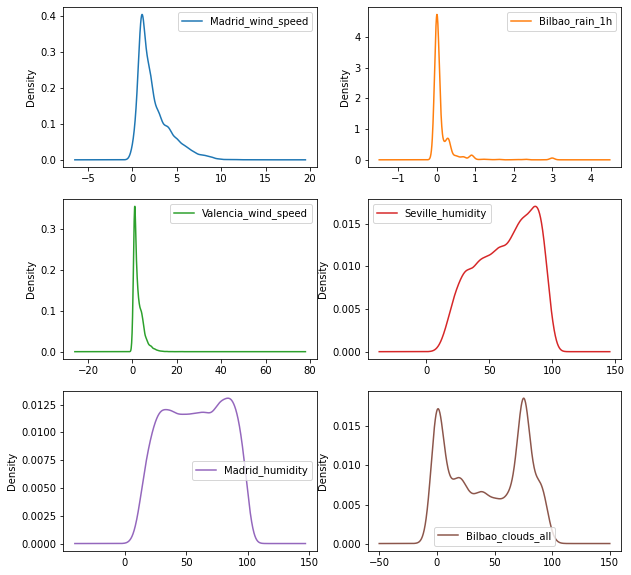

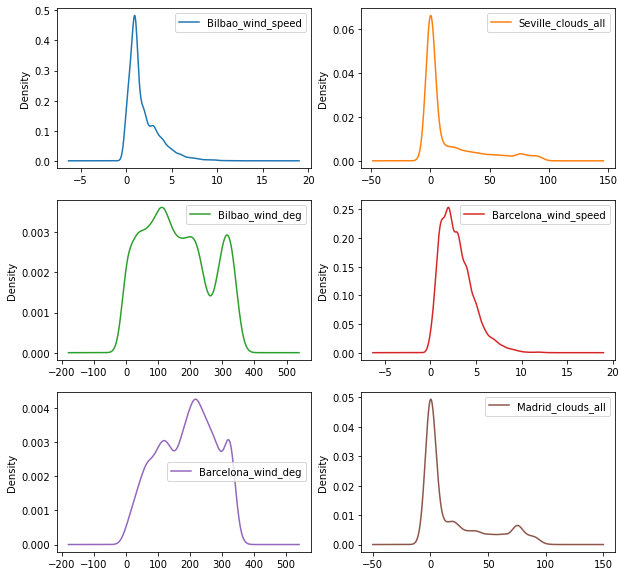

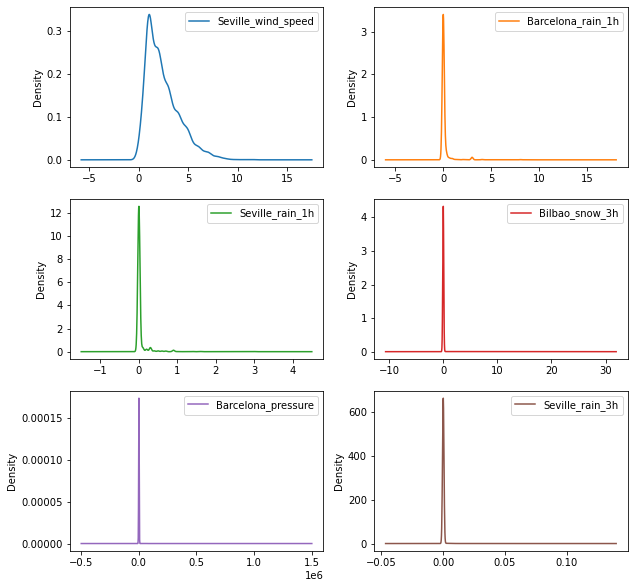

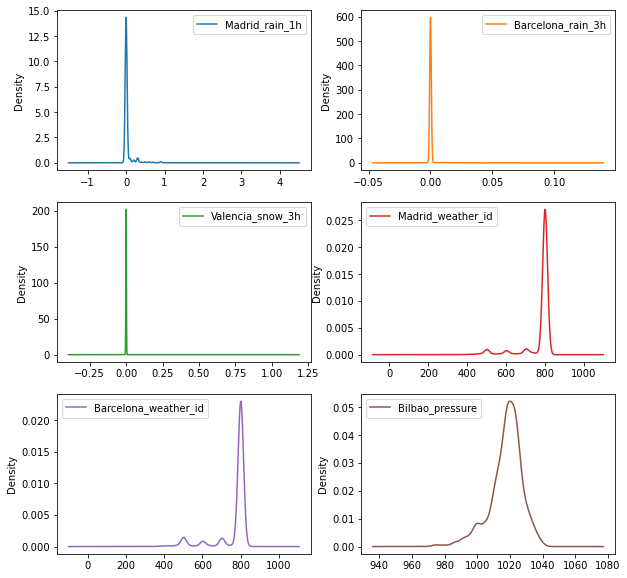

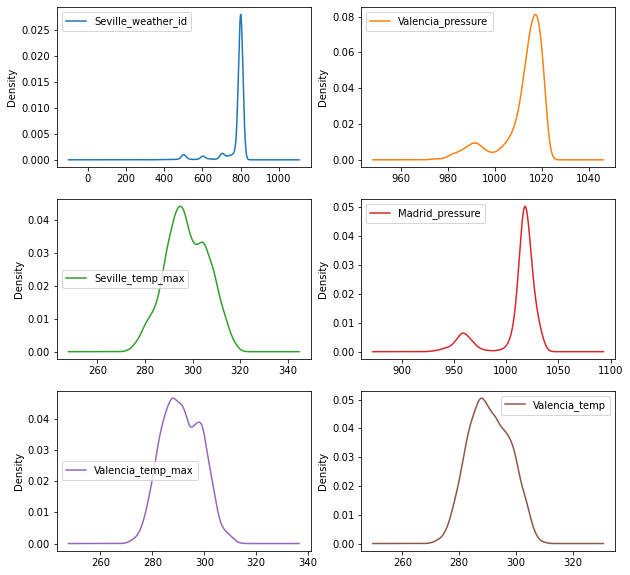

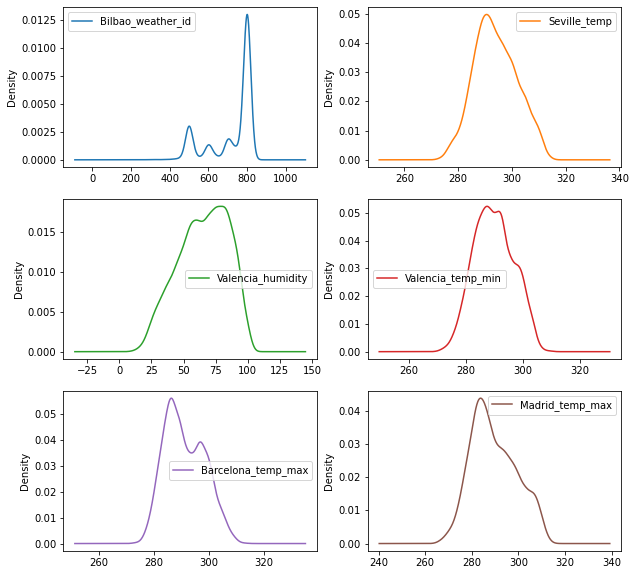

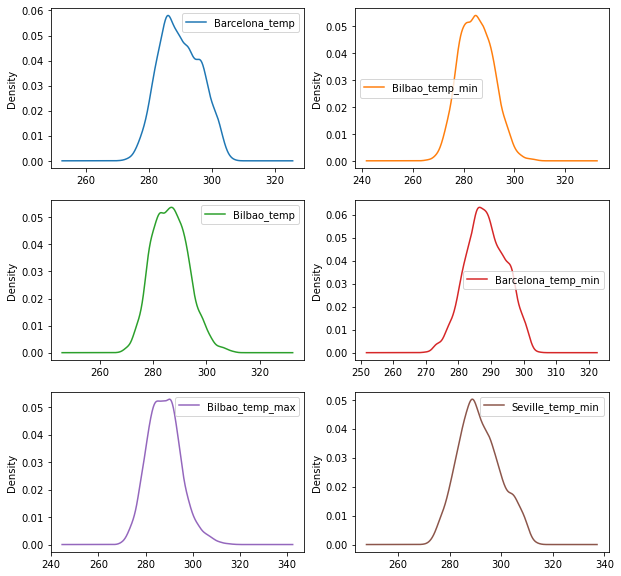

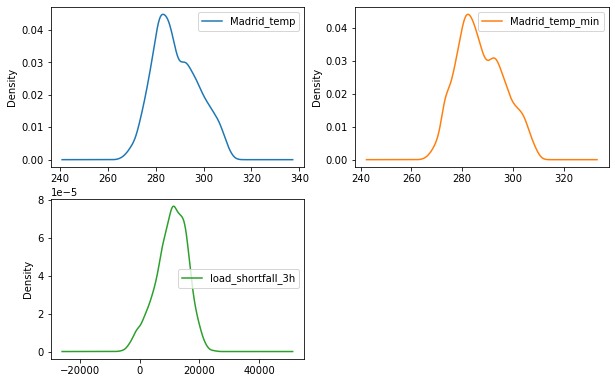

In [13]:
# Plot for all numerical features
# First six
features_1 = ['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed', 
            'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all']
;


# Next six 
features_2 = ['Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
             'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all']
;


# Next six
features_3 = ['Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h', 
            'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h']
;


# Next six
features_4 = ['Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h', 
            'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure']
;

# Next six
features_5 = ['Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
            'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp']
;

# Next six
features_6 = ['Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity', 
            'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max']
;

# Next six
features_7 = ['Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 
            'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min']


# Last set
features_8 = ['Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h']

df[features_1].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));
df[features_2].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));
df[features_3].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));
df[features_4].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));
df[features_5].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));
df[features_6].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));
df[features_7].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));
df[features_8].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

**Univariate Analysis: Graphical**

**For numerical features, we use the following plots:**
- histogram
- density plot
- box plot
- violin plot


**For categorical features, we use a:**
- bar plot

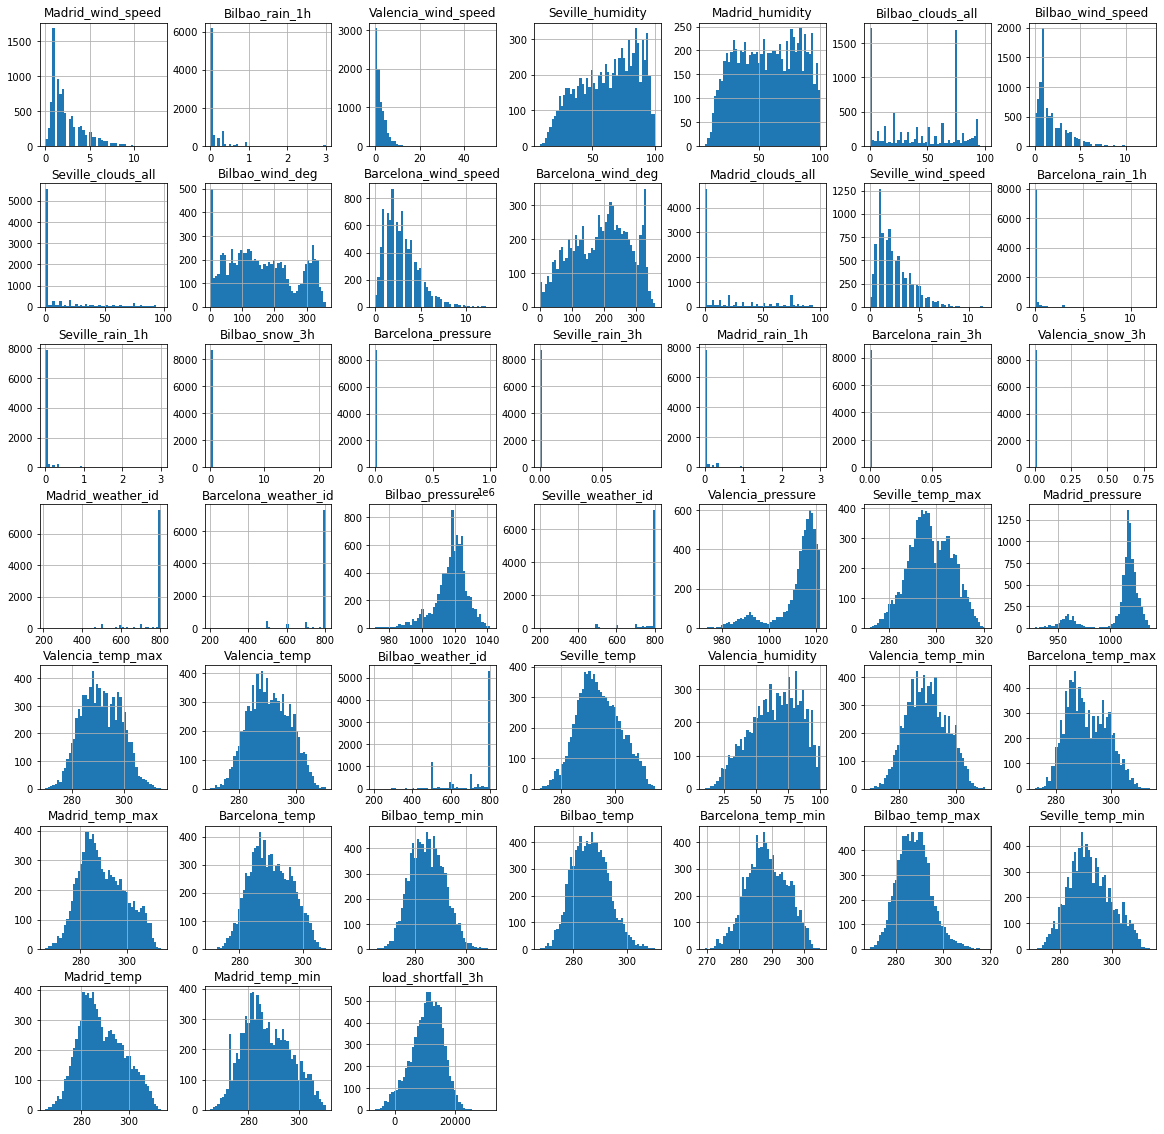

In [14]:
df.hist(bins=50, figsize=(20,20), color = 'tab:blue')
plt.show()

The histogram and density plots of the features confirm the intuition gathered from the skewness and kurtosis. Where the rain, snow and weather id features were highly positively and negatively skewed. It is also noted that even though the clouds feature was not in the extremes of skewness or kurtosis, they have frequency of no observation(0), is high.

The temperature and load shortfall variables are fairly symmetrical. The symmetry of pressure and humidity varies between towns

**Box Plot and Violin Plot** 

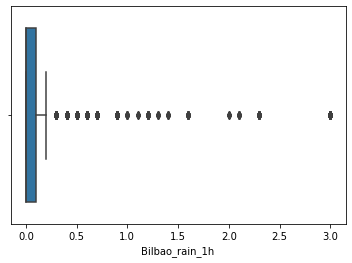

In [15]:
sns.boxplot(x='Bilbao_rain_1h', data=df);

Majority of the observations made about the rain were 0, meaning, there was no rain on most days. The outliers that are in the boxplot above are the measurements of the days it rained in Bilbao.

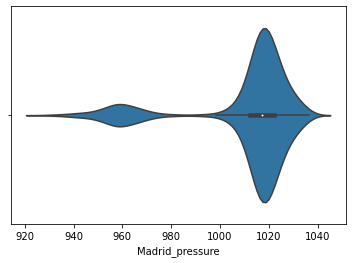

In [16]:
sns.violinplot(x='Madrid_pressure', data=df);

The violin plot of the measurements of pressure in Madrid is similar to those in other towns. Majority of the pressure are of high values, and the minimum is 920. 

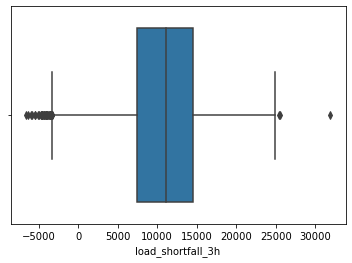

In [17]:
sns.boxplot(x='load_shortfall_3h', data=df);

The load shortall ranges between -5,000 to 25,000. The negative values are caused by *_____*

**Categorical Features**

Bar plot to display the frequency distribution


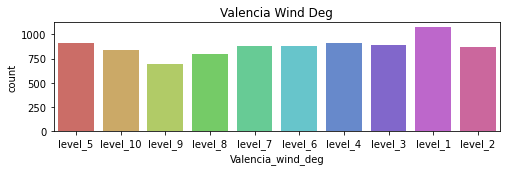

In [18]:
#Valencia_wind_deg
plt.figure(figsize = (8,2))
sns.countplot(x = 'Valencia_wind_deg', data = df, palette="hls")
plt.title("Valencia Wind Deg");


Level one wind degree was observed the most in the Valencia with level 9 being the least observed.

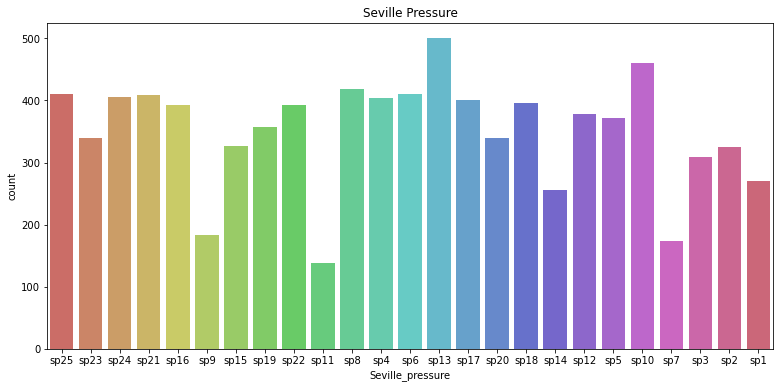

In [19]:
# Seville_pressure
plt.figure(figsize = (13,6))
sns.countplot(x = 'Seville_pressure', data = df, palette="hls")
plt.title("Seville Pressure");

The highest pressure observed in Seville is sp25 which has a frequency of approximately 400 while the lowest is sp1 with a frequency of approximately 280. The sp with the highest frequency is sp13.

The pressure and wind degree in other towns are taken in numerical value. The above categorical features will be converted to numerical data types in the Feature Engineeering Section.

The time column is stored as a categorical data type. It will be converted to datetime in the next section to further understand it.

<AxesSubplot:>

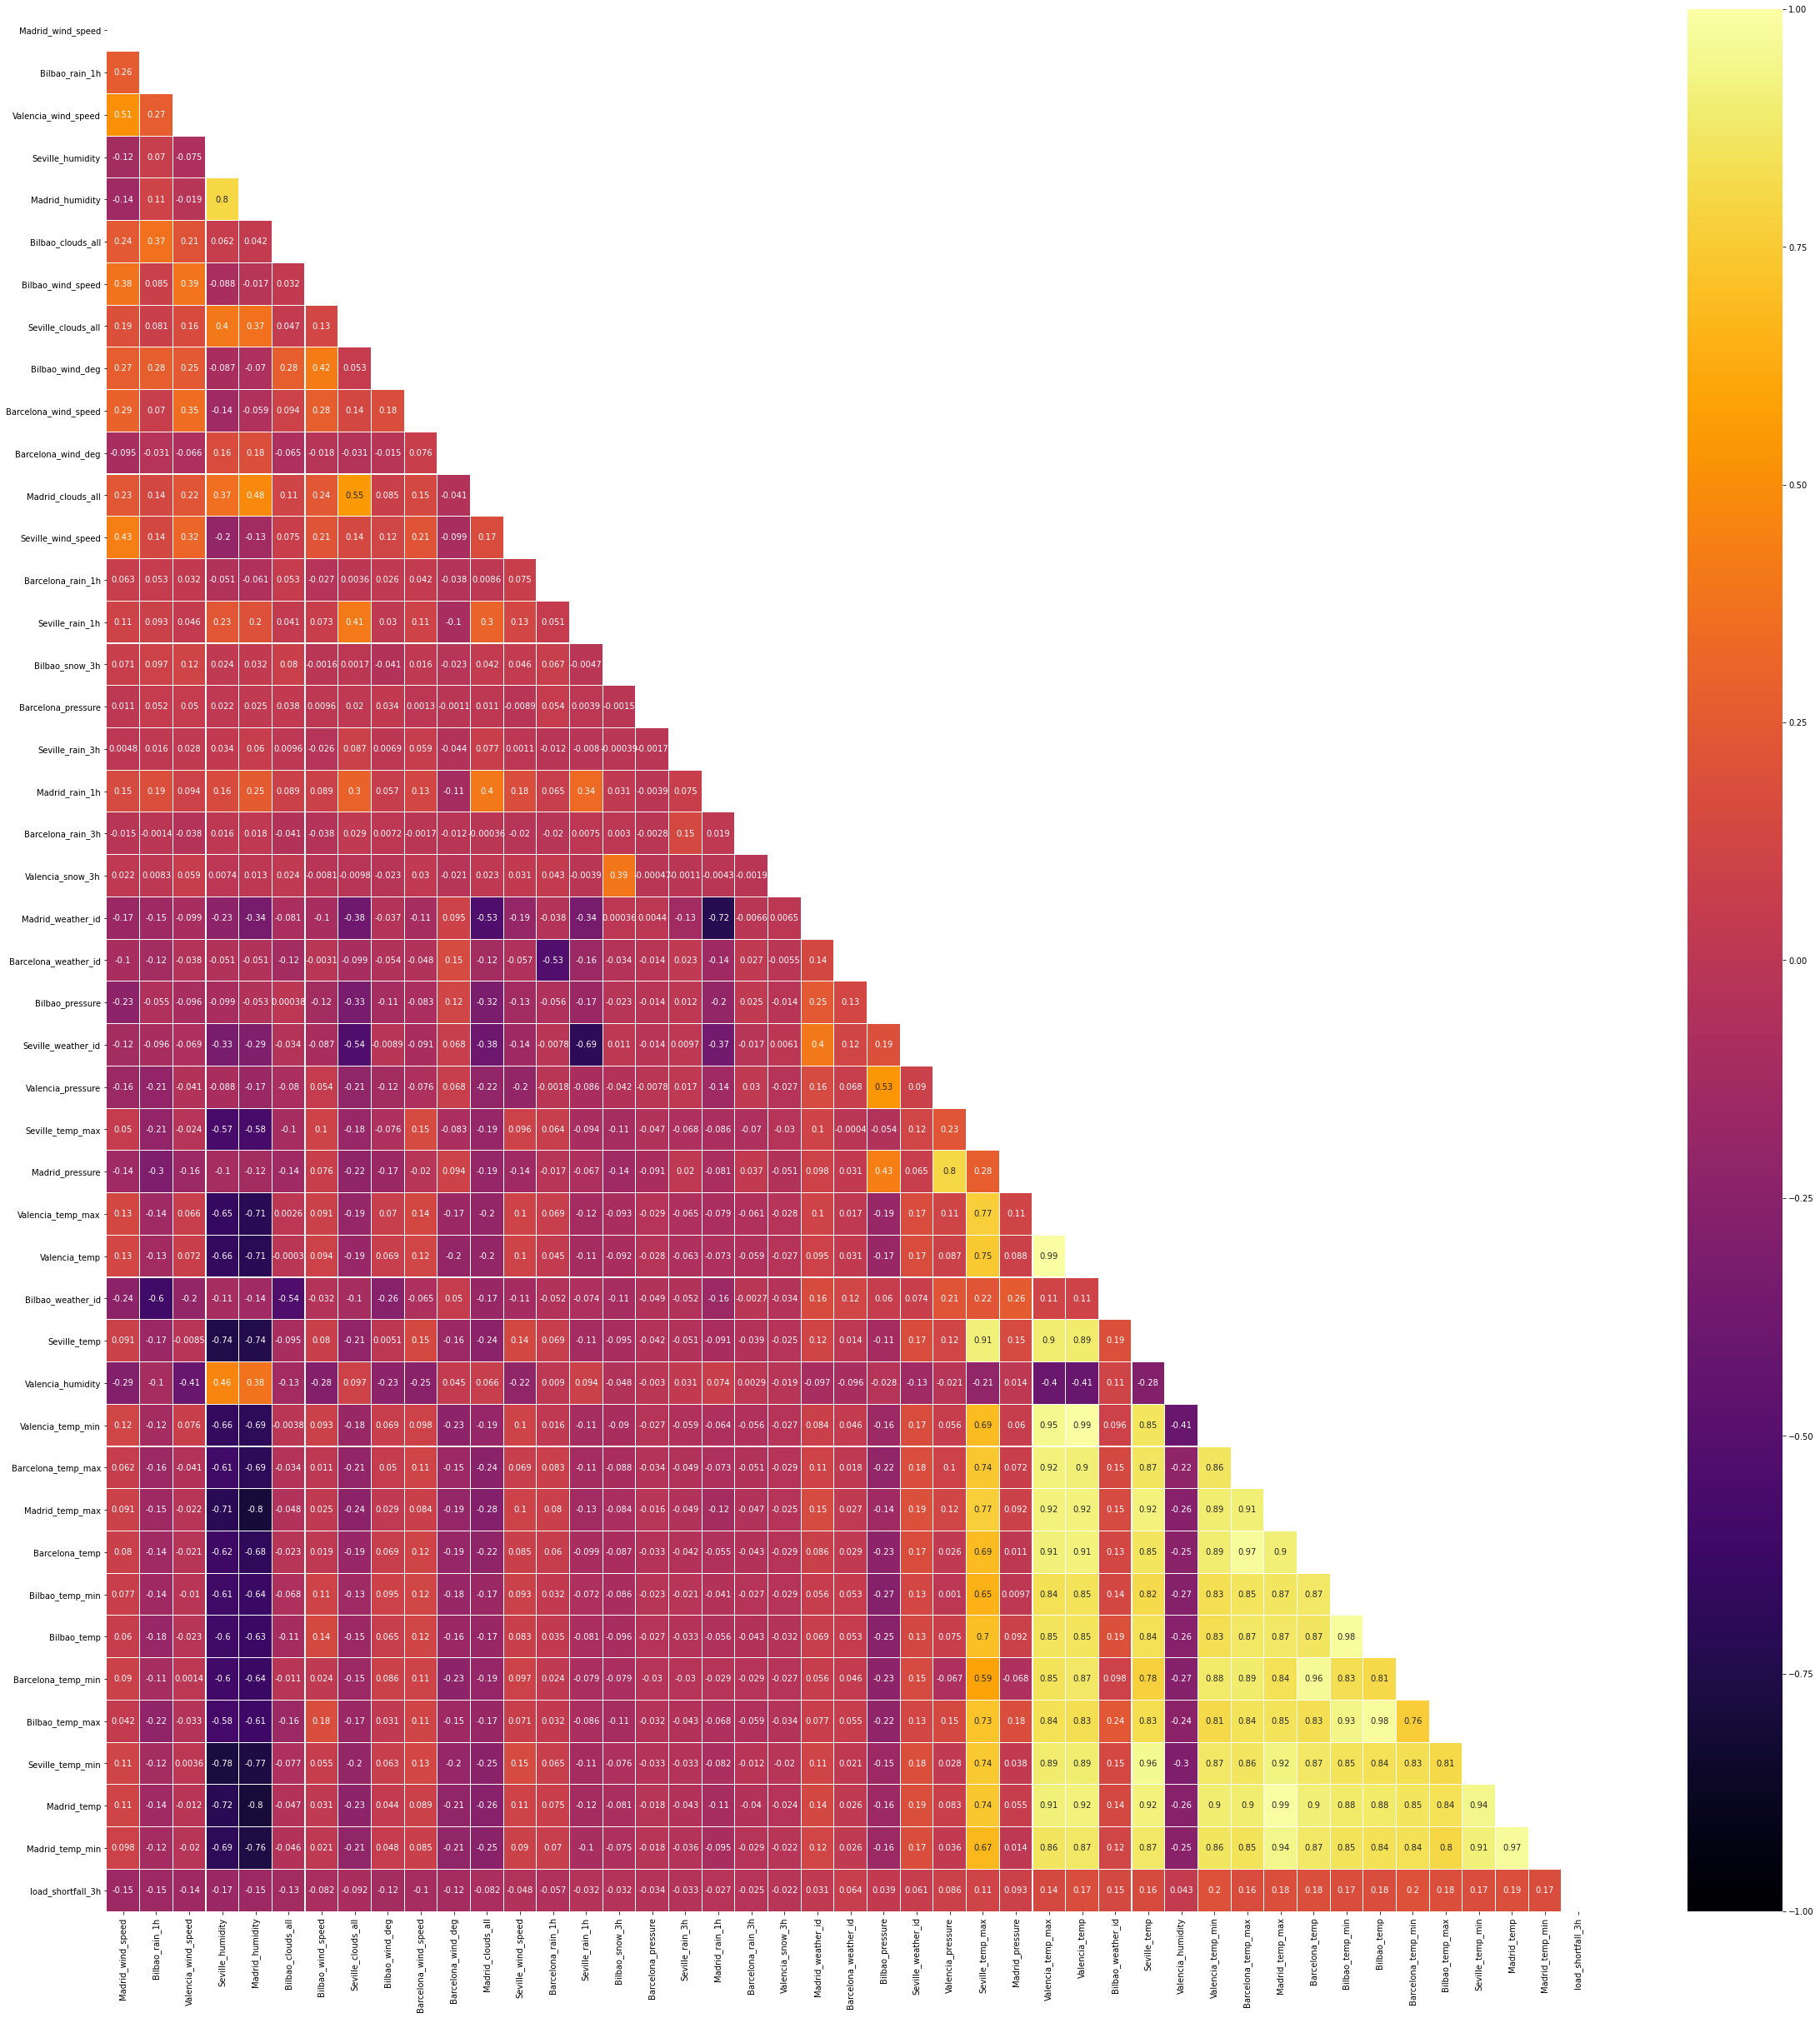

In [20]:
#Plotting correlation heat map for predictor variable in train 
train_corr = df.corr()

# Mask top half of matrix as it contains redunant info
mask = np.zeros_like(train_corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Plot the matrix
plt.figure(figsize=(40,42))
sns.heatmap(train_corr,annot=True, vmin=-1, vmax=1, cmap='inferno', linewidth=0.1, mask = mask)

The correlation matrix and the heat map above show that temperature features had the highest correlation with our y variable, load shortfall. The rain and snow elements had the lower correlation with our y variable.


Columns with measurements of temp_max, temp_min and temp in a city are highly correlated. This may bring multicollinearity issues with our model and will be dropped.

#### Time and Load Shortfall Analysis

To analyse the relationship between time and the load shortfall. We convert the column from object to datetime64 as below,

In [21]:
df['time'] = pd.to_datetime(df['time'])
df['time'].head()

0   2015-01-01 03:00:00
1   2015-01-01 06:00:00
2   2015-01-01 09:00:00
3   2015-01-01 12:00:00
4   2015-01-01 15:00:00
Name: time, dtype: datetime64[ns]

Next, we visualize the time against the three hour load shortfall using a line plot

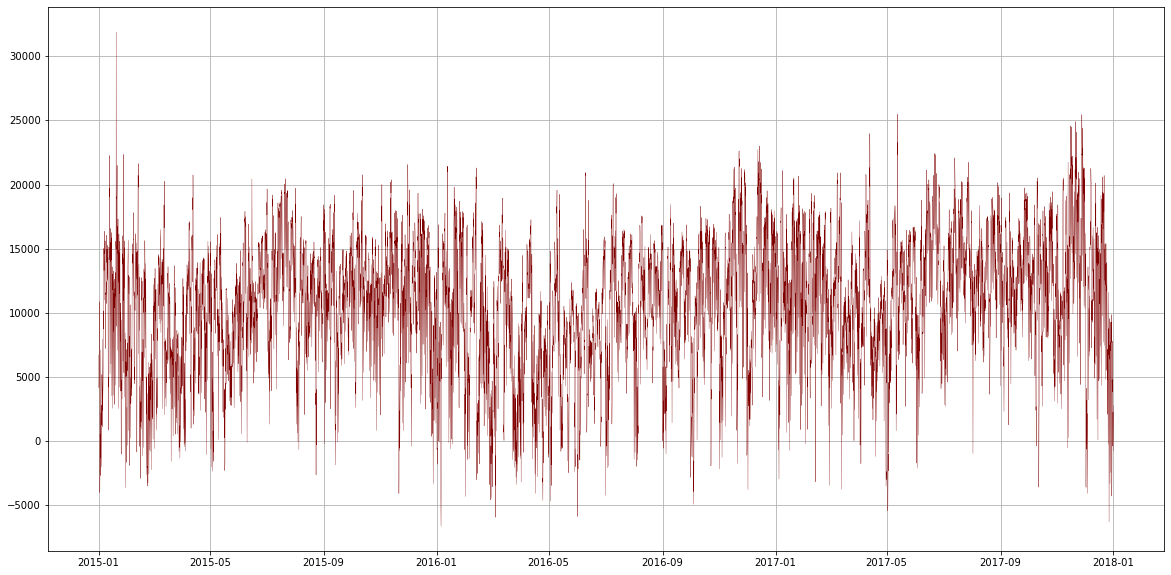

In [22]:
plt.figure(figsize = (20,10))
plt.plot(df['time'],df['load_shortfall_3h'], color = 'maroon', linewidth = 0.3)
plt.grid(True)
plt.show()

As demonstrated above, the graph has very many data points. This is expected since the load_shortfall is measured every 3 hours. 

To make clear observations of the variation of shortfall with time, we will break down the time variant in the next section and visualize. The variations are grouped by the year, hour of day, day of the week, day of the year and the month of the year.

In [23]:
df['year'] = pd.to_datetime(df['time']).dt.year
df['month_of_year'] = pd.DatetimeIndex(df['time']).month
df['hour_of_day'] = pd.DatetimeIndex(df['time']).hour
df['week_of_year'] = df['time'].dt.isocalendar().week
df['week_of_year'] = df['week_of_year'].astype(int)
df['day_of_week'] = pd.DatetimeIndex(df['time']).dayofweek

The function below will create a plot for the year, month, day. Where df is the dataframe, the time_values is the time_value 
and y_values the numerical column to summarize

In [24]:
def create_and_plot(df,time_values,y_values):
    
    #create a dataframe from the columns
    y1 = df[[time_values, y_values]]
    title = 'Average ' + y_values + ' per ' + time_values
    
    #visualize using sns.barplot with the summary statistic as mean
    sns.barplot( x = time_values, y = y_values, data = y1, ci = None,
            estimator = np.mean, palette="cool").set(title = title)
    
    return

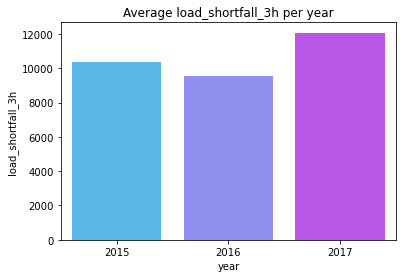

In [25]:
create_and_plot(df,'year','load_shortfall_3h')

On average, the year 2016 experienced the lowest three hour load shortfall and the year 2017 had the highest.

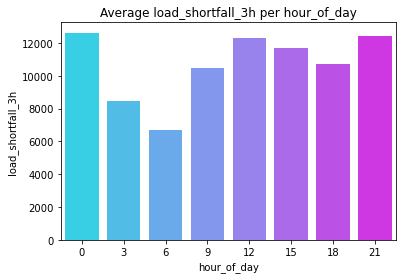

In [26]:
create_and_plot(df,'hour_of_day','load_shortfall_3h')

It is observed that on average, the load shortfall is lowest at 06:00 and highest at 00:00 for the dataset we have.

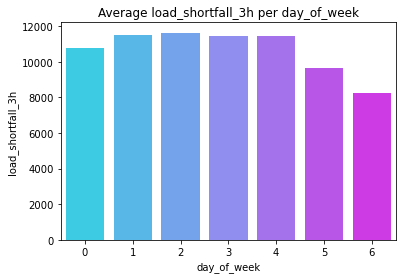

In [27]:
create_and_plot(df,'day_of_week','load_shortfall_3h')

The bar plot above suggests that the average load shortfall is lowest on Sunday. The graph seems to similar to a bell shapped data frame, with the higher values of average load shortfall observed in the middle of the week 

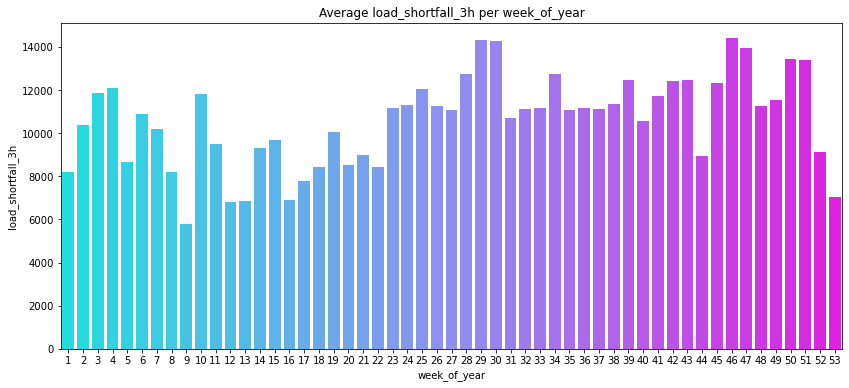

In [28]:
plt.figure(figsize = (14,6))
create_and_plot(df, 'week_of_year','load_shortfall_3h')

The overall trend of the graph suggests a positive correlation between the week of the year and the average load shortfall as majority of the lower values are observed in the beginning weeks of the year and the higher value observations at the end weeks of the year.

It is important to note that the low load shortfall averages observed in week 1, week 52 and week 53 may be contributed by the small number of observations. The beginning and end weeks of the year has fewer days

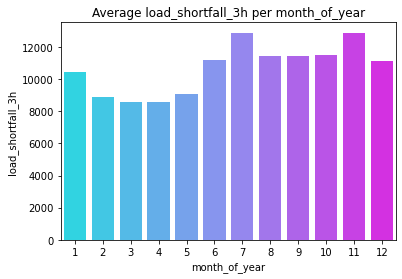

In [29]:
create_and_plot(df,'month_of_year','load_shortfall_3h')

The month with the lowest average 3 hour load shortfall is March and the highest is July. As observed with the week of year, the month indicates a positive correlation with the y variable.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

#### Creating Temporal Features and Analysis 

As seen the in Explaratory Data Analysis, there may exist relationships between some time variants and the three hour load shortfall. In the cells below we attempt to go deeper in our understanding of these relationships using Pearson's correlation coefficient. 

The time column is broken down to nine temporal features namely:

1. Year
2. Month of the year
3. Week of the year
4. Day of the month
5. Day of the week
6. Day of the year
7. Hour of the day
8. Hour of the week
9. Hour of the year


In [127]:
df['year'] = pd.to_datetime(df['time']).dt.year
df['month_of_year'] = pd.to_datetime(df['time']).dt.month
df['week_of_year'] = df['time'].dt.isocalendar().week.astype(int)
df['day_of_month'] = pd.DatetimeIndex(df['time']).day
df['day_of_week'] = pd.DatetimeIndex(df['time']).dayofweek
df['day_of_year'] = pd.DatetimeIndex(df['time']).dayofyear
df['hour_of_day'] = pd.DatetimeIndex(df['time']).hour
df['hour_of_the_week'] = df['day_of_week'] * 24 + (df['hour_of_day'] + 1)
df['hour_of_year'] = df['day_of_year'] * 24 + df['hour_of_day']

'''We position the load shortfall(predictor value) to the end of the dataframe
    to increase readability of heatmaps generated
'''
column_titles = [col for col in df.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
df = df.reindex(columns=column_titles)

#Create a dataframe for our analysis
df_temp_features = df[['time','year', 'month_of_year', 'week_of_year','day_of_month',
                      'day_of_week','day_of_year','hour_of_day', 'hour_of_the_week',
                      'hour_of_year','load_shortfall_3h']]

###### The df_temp_features dataframe is used to see the correlation between the temporal features and load shortfall.

In [140]:
corr = df_temp_features.corr().round(4)
corr

,year,month_of_year,week_of_year,day_of_month,day_of_week,day_of_year,hour_of_day,hour_of_the_week,hour_of_year,load_shortfall_3h
year,1.0000,-0.0010,-0.0128,-0.0010,0.0017,-0.0011,0.0003,0.0017,-0.0011,0.1313
month_of_year,-0.0010,1.0000,0.9758,0.0088,0.0001,0.9965,0.0003,0.0002,0.9965,0.1990
week_of_year,-0.0128,0.9758,1.0000,0.0718,-0.0048,0.9778,0.0003,-0.0047,0.9778,0.2011
day_of_month,-0.0010,0.0088,0.0718,1.0000,-0.0027,0.0921,0.0003,-0.0027,0.0921,0.0921
day_of_week,0.0017,0.0001,-0.0048,-0.0027,1.0000,-0.0001,0.0000,0.9899,-0.0001,-0.1565
day_of_year,-0.0011,0.9965,0.9778,0.0921,-0.0001,1.0000,0.0003,-0.0000,1.0000,0.2055
hour_of_day,0.0003,0.0003,0.0003,0.0003,0.0000,0.0003,1.0000,0.1418,0.0030,0.1393
hour_of_the_week,0.0017,0.0002,-0.0047,-0.0027,0.9899,-0.0000,0.1418,1.0000,0.0003,-0.1352
hour_of_year,-0.0011,0.9965,0.9778,0.0921,-0.0001,1.0000,0.0030,0.0003,1.0000,0.2059
load_shortfall_3h,0.1313,0.1990,0.2011,0.0921,-0.1565,0.2055,0.1393,-0.1352,0.2059,1.0000


According to the correlation matrix, the day of the month has the lowest correlation to the load shortall and the hour of the year has the highest correlation. It is also observed that between high correlations, indicating multicollinearity amongst the time variables.


These paired variables are:
- month_of_year and week_of_year
- month_of_year and hour_of_year
- month_of_year and day_of_year
- week_of_year and day_of_year
- week_of_year and hour_of_year
- day_of_week and hour_of_week

Let's visualize these in a heatmap

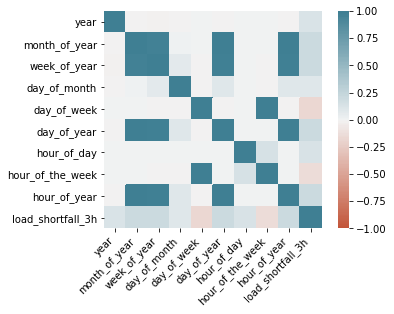

In [32]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Focusing on the bottom row in the heatmap above, we observe weak negative correlation with day of the week and hour of the week with the three hour load shortfall. 
In addition, the month, week, day and hour of the year display a weak positive correlation. The day of the month has the lowest correlation with the load shortfall

Now that the temporal features have been created, we check their data types to ensure they are all numerical

In [129]:
df[['time','year', 'month_of_year', 'week_of_year','day_of_month',
    'day_of_week','day_of_year','hour_of_day', 'hour_of_the_week',
    'hour_of_year','load_shortfall_3h']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time               8763 non-null   datetime64[ns]
 1   year               8763 non-null   int64         
 2   month_of_year      8763 non-null   int64         
 3   week_of_year       8763 non-null   int32         
 4   day_of_month       8763 non-null   int64         
 5   day_of_week        8763 non-null   int64         
 6   day_of_year        8763 non-null   int64         
 7   hour_of_day        8763 non-null   int64         
 8   hour_of_the_week   8763 non-null   int64         
 9   hour_of_year       8763 non-null   int64         
 10  load_shortfall_3h  8763 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(8)
memory usage: 1.0 MB


### Filling the empty cells in Valencia_pressure 

In order for us to proceed, we need to fill in the missing values in our dataset. Here, we have decided to fill in these missing values with the mean as is best practice for a column of numerical values.

In [35]:
#Fill the empty cells in Valencia_pressure

df = df.fillna(df['Valencia_pressure'].mean())


In [130]:
df[['Valencia_pressure']].isna().sum()

Valencia_pressure    0
dtype: int64

The null values have successfully been replaced

### Dummy Variables Creation



Regression models can only fit numerical data. Hence, we need to convert our categorical columns to numerical using dummy variables. 

The cell below displays the categorical data columns that we need to convert to numerical.

In [37]:
#We identify the categorical columns

col_list = []
for col in df.columns:
    if df[col].dtype == object:
        col_list.append(col)
col_list

['Valencia_wind_deg', 'Seville_pressure']

Then create the dummy variables for the two categorical columns that we have; Valencia_wind_deg and Seville_pressure, below.

In [38]:
#Creating Dummy Variables

df_dummies = df.copy()

#Converting Valencia_wind_deg to numerical
df_dummies["Valencia_wind_deg"] = df_dummies['Valencia_wind_deg'].str.extract('(\d+)')
df_dummies["Valencia_wind_deg"] = pd.to_numeric(df_dummies["Valencia_wind_deg"])

#Converting Seville_pressure to numerical
df_dummies["Seville_pressure"] = df_dummies['Seville_pressure'].str.extract('(\d+)')
df_dummies["Seville_pressure"] = pd.to_numeric(df_dummies["Seville_pressure"])

_Given that the categorical columns contain unique values, we extracted the numerical values and converted the column to a numerical column_

In [39]:
df_dummies.shape

(8763, 57)

_As a result, the number of columns remained the same_

### Correlation

Correlation explains the (level of) relationship between the predictors (X) variables and the target (Y) variable. A correlation value of 0 indicates that there isn't any correlation between the variables, a value of or towards -1 shows a negative correlation while a value of or towards 1 shows positive correlation.

The cell below displays the correlation between the features and the load_shortfall_3h variable.

In [40]:
df_dummies.corr()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month_of_year,hour_of_day,week_of_year,day_of_week,day_of_month,day_of_year,hour_of_the_week,hour_of_year,load_shortfall_3h
Madrid_wind_speed,1.000000,0.121835,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,-0.182792,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.142737,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.031553,-0.237445,1.862275e-01,-0.236441,-4.042128e-04,-0.029954,-0.238991,0.026010,-0.238483,-0.150981
Valencia_wind_deg,0.121835,1.000000,0.199288,0.292731,0.240007,0.253549,0.158266,0.075864,0.085519,0.157252,0.042795,0.151146,0.105080,-0.007258,0.000699,0.274340,-0.019783,0.069929,0.026729,-0.019602,-0.017304,0.016777,0.020481,-0.003746,-0.018537,-0.099051,0.000478,-0.164502,-0.328244,-0.189989,-0.245685,-0.252334,-0.209860,-0.342016,-0.192267,-0.255626,-0.260643,-0.341696,-0.260622,-0.265992,-0.283031,-0.240981,-0.292904,-0.311775,-0.337965,-0.316603,-0.057513,-0.140195,-1.384151e-01,-0.136023,1.306817e-02,-0.010627,-0.139043,-0.006694,-0.139418,-0.188674
Bilbao_rain_1h,0.259719,0.199288,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.067471,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.199341,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.200747,-0.188274,5.452669e-02,-0.179233,3.232531e-02,0.072752,-0.181232,0.039731,-0.181083,-0.152510
Valencia_wind_speed,0.513092,0.292731,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,-0.065082,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.038234,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.012650,-0.237156,2.041029e-01,-0.232338,1.896518e-02,-0.000340,-0.235317,0.047719,-0.234761,-0.142791
Seville_humidity,-0.117892,0.240007,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.217941,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.078962,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.045730,-0.111622,-4.249821e-01,-0.094444,8.265003e-03,0.032979,-0.106347,-0.052089,-0.107501,-0.167290
Madrid_humidity,-0.137092,0.253549,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.294543,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.146866,-0.

#### Generating the Heatmap

In the cell above, we looked at the correlation between the variables. This is not so easy to interpret as the numbers may become quite overwhelming to look at. A better way to look at the correlation is by generating heatmaps.

Heatmaps are graphic visualizations that enable to see the correlations better.

The Heatmap below shows the level of correlation amongst the variables. It can be observed that there is a very high level of correlation from Seville_temp_max to Madrid_temp_min

In [41]:
#Re-order Columns
column_titles = [col for col in df_dummies.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
df_dummies=df_dummies.reindex(columns=column_titles)


# After temporal features rerun heatmap and include the specific categorical colums in the get_dummies
#lagged variables
#and temporary aggregate target variables

###### We position the load shortfall(predictor value) to the end of the dataframe to increase readability of heatmaps generated

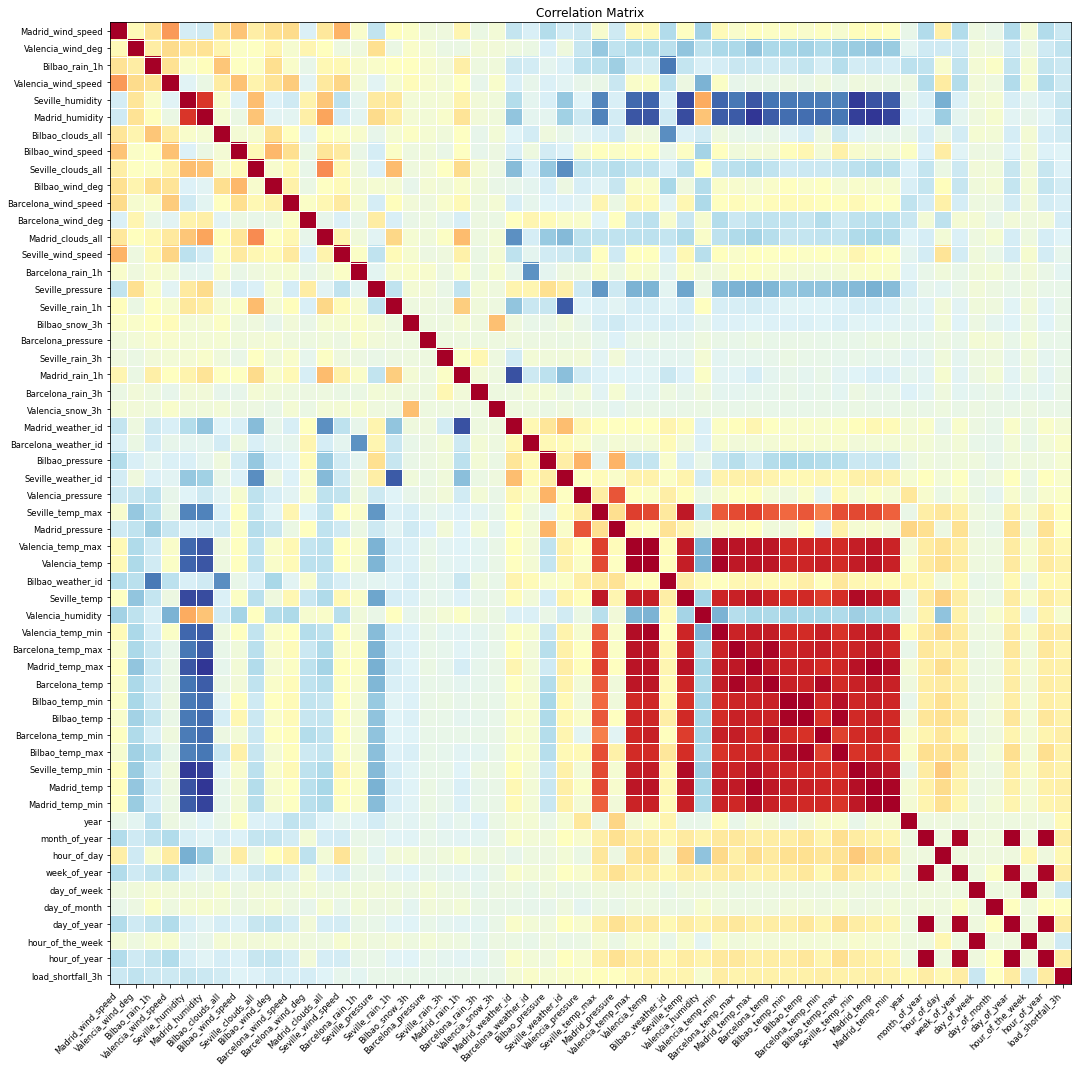

In [42]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_dummies.corr(), xnames = df_dummies.corr().columns, ax = ax);

In [43]:
train_df = df_dummies.drop('time', axis=1)

###### In Order for standardization or Normalization to be caried out, all coloumns in our datasets must be numeric, giving that the time column is off date_time format the time column must be removed from our dataset.

## Variable Selection by Variance Thresholds

Variance Thresholds remove features whose values don't change much from observation to observation. The objective here is to remove all features that have a variance lower than the selected threshold.

It is important to note that variance is dependent on scale. For ease of comparison, the features will have to be _normalized_ before implementing variance thresholding.


In [131]:
#Separate our target variables from the predictor variable

#Target variable
y_name = 'load_shortfall_3h'
y_data = train_df[y_name]

# Independent/Predictive Variables
X_names = list(train_df.columns)
X_names.remove(y_name)
X_data = train_df[X_names]

In [59]:
# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X_data)
X_normalize_data = pd.DataFrame(scaled_data, columns=X_data.columns)

###### Normalization put constraints on the size of the coefficeints, we attempt to squeeze the range of each of our variables into the exact same range which is between [0,1].

In [60]:
X_normalize_data.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month_of_year,hour_of_day,week_of_year,day_of_week,day_of_month,day_of_year,hour_of_the_week,hour_of_year
0,0.051282,0.444444,0.0,0.012821,0.720000,0.615658,0.00,0.078947,0.0,0.621521,0.500000,0.118519,0.0,0.285714,0.0,1.0,0.0,0.0,0.000365,0.0,0.0,0.0,0.0,0.993255,0.99337,0.900943,0.993377,0.612245,0.045263,0.395770,0.000000,0.000000,0.993296,0.051072,0.728625,0.000000,0.211393,0.019286,0.279352,0.107102,0.042920,0.326311,0.005636,0.091896,0.019827,0.021028,0.0,0.0,0.142857,0.0,0.5,0.0,0.0,0.454545,0.000342
1,0.025641,1.000000,0.0,0.032051,0.763636,0.622776,0.00,0.078947,0.0,0.615028,0.315789,0.386111,0.0,0.285714,0.0,1.0,0.0,0.0,0.000366,0.0,0.0,0.0,0.0,0.993255,0.99337,0.910377,0.993377,0.646259,0.059520,0.407855,0.041472,0.045397,0.993296,0.067158,0.676580,0.045571,0.200628,0.028350,0.266986,0.129985,0.066919,0.313538,0.026849,0.107351,0.029145,0.030910,0.0,0.0,0.285714,0.0,0.5,0.0,0.0,0.472727,0.000683
2,0.076923,0.888889,0.0,0.019231,0.687273,0.619217,0.00,0.078947,0.0,0.596475,0.157895,0.905556,0.0,0.228571,0.0,1.0,0.0,0.0,0.000367,0.0,0.0,0.0,0.0,0.993255,0.99337,0.915094,0.993377,0.666667,0.138971,0.419940,0.183000,0.200319,0.993296,0.156803,0.617100,0.201086,0.225004,0.156067,0.294986,0.232586,0.174519,0.342462,0.121959,0.193478,0.160443,0.170162,0.0,0.0,0.428571,0.0,0.5,0.0,0.0,0.490909,0.001025
3,0.076923,0.777778,0.0,0.019231,0.621818,0.533808,0.00,0.078947,0.0,0.555659,0.184211,0.758333,0.0,0.342857,0.0,1.0,0.0,0.0,0.000366,0.0,0.0,0.0,0.0,0.993255,0.99337,0.915094,0.993377,0.741497,0.275318,0.607251,0.338286,0.370302,0.993296,0.310647,0.486989,0.371720,0.269139,0.341654,0.345683,0.367318,0.315817,0.394833,0.246854,0.341284,0.351233,0.372508,0.0,0.0,0.571429,0.0,0.5,0.0,0.0,0.509091,0.001367
4,0.076923,0.666667,0.0,0.019231,0.552727,0.540925,0.02,0.026316,0.0,0.514842,0.342105,0.722222,0.0,0.257143,0.0,1.0,0.0,0.0,0.000364,0.0,0.0,0.0,0.0,0.993255,0.99337,0.905660,0.993377,0.803770,0.277791,0.975831,0.295820,0.323817,0.993296,0.313437,0.535316,0.325057,0.287721,0.317073,0.367027,0.391957,0.341658,0.416882,0.269695,0.343964,0.325963,0.345707,0.0,0.0,0.714286,0.0,0.5,0.0,0.0,0.527273,0.001708


### Variance Threshold in Scikit Learn¶
To implement Variance Threshold in Scikit Learn we have to do the following:

- Import and create an instance of the VarianceThreshold class.
- Use the .fit() method to select a subset of features based on the threshold.

###### Advantages of using the variance threshold
    1. Assists in determining which predictive variables are most important for predictions.
    2. Easy identification of predictive variables with low variance which contain little information about our target
       variable. These variables are discarded.
    

###### After hyperparameter tuning,  we chose the 0.04 variance threshold which retains the most predictive variables of 42 with low multicolinearity among predictive variables.

In [61]:
# Create VarianceThreshold object
selector_1 = VarianceThreshold(threshold=0.04)
selector_2 = VarianceThreshold(threshold=0.05)

In [62]:
# Use the object to apply the threshold on data
selector_1.fit(X_normalize_data)

VarianceThreshold(threshold=0.04)

In [63]:
selector_2.fit(X_normalize_data)

VarianceThreshold(threshold=0.05)

The Variance Threshold has been applied to the data. Let's look at the calculated variance for each predictive variable.

In [134]:
# Get column variances
column_variances_1 = selector_1.variances_
column_variances_2 = selector_2.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize_data.columns, column_variances_1)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', axis = 0, ascending=False)


,Variable_Name,Variance
46,year,0.166467
50,day_of_week,0.111009
48,hour_of_day,0.107136
6,Bilbao_clouds_all,0.105945
1,Valencia_wind_deg,0.102221
47,month_of_year,0.098241
15,Seville_pressure,0.090924
53,hour_of_the_week,0.086286
51,day_of_month,0.086009
49,week_of_year,0.083906


The above table shows the variances of the individual columns before any threshold is applied. It allows us to revise our initial variance threshold if we feel that we might exclude important variables.

The variance threshold shows the majority of the rain and snow features contain a small relatioship with the load shortfall. This supporting our intuition in the Exploration of the Data segment.

Next we need to extract the results and use them to select our new columns - which form a subset of all the columns.

In [65]:
# Select subset of columns and create a dataframe
X_1_normalize = X_normalize_data[X_normalize_data.columns[selector_1.get_support(indices=True)]]
X_2_normalize = X_normalize_data[X_normalize_data.columns[selector_2.get_support(indices=True)]]


Now let's graph the number of predictors by the thresholds to investigate the relationship:

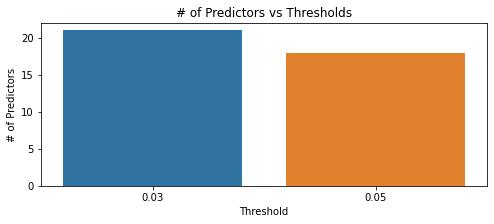

In [66]:
# Create figure and axes
f, ax = plt.subplots(figsize=(8, 3), nrows=1, ncols=1)

# Create list of titles and predictions to use in for loop
subset_preds = [X_1_normalize.shape[1], X_2_normalize.shape[1]]
thresholds = ['0.03', '0.05']

# Plot graph
ax.set_title('# of Predictors vs Thresholds')
ax.set_ylabel('# of Predictors')
ax.set_xlabel('Threshold')
sns.barplot(x=thresholds, y=subset_preds)
plt.show()

### Generating the Heatmap

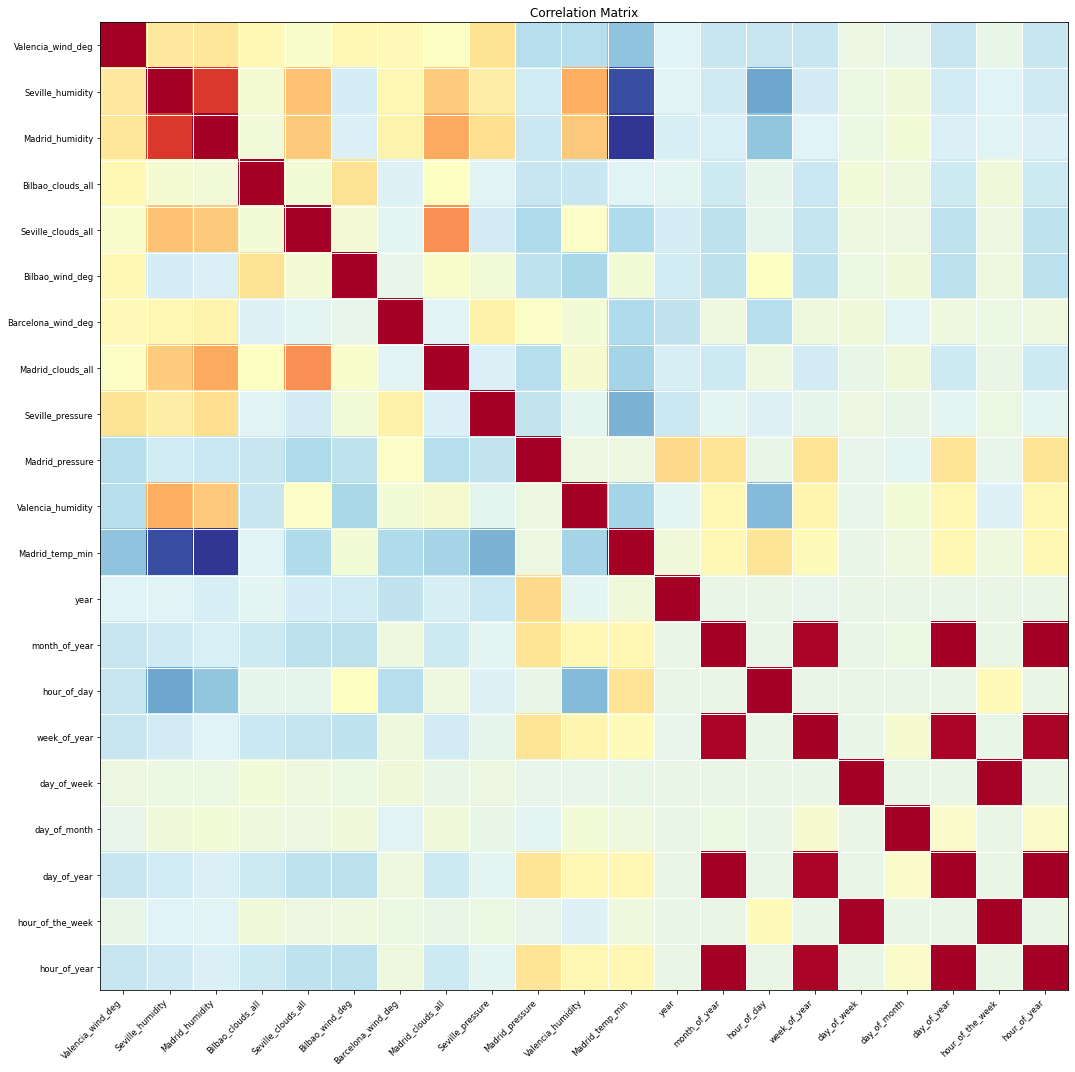

In [67]:
#Checking for multicolinearity
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(X_1_normalize.corr(), xnames = X_1_normalize.corr().columns, ax = ax);

##### The above Heatmap Shows a Correlation among Temporal Time Variable

We see that their is presence of correlation in the time features. Given the high variance of each of the time features, we will retain them for our modelling

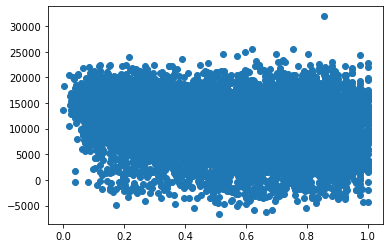

In [68]:
plt.scatter(X_1_normalize['Madrid_humidity'], y_data)

Let's observe OLS fit summary for a threshold of 0.04 :

In [69]:
# What is our new OLS formula?
formula_str = y_name+' ~ '+' + '.join(X_1_normalize.columns)
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ Valencia_wind_deg + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_deg + Madrid_clouds_all + Seville_pressure + Madrid_pressure + Valencia_humidity + Madrid_temp_min + year + month_of_year + hour_of_day + week_of_year + day_of_week + day_of_month + day_of_year + hour_of_the_week + hour_of_year


In [70]:
#Fit the model using the model dataframe
model = ols(formula=formula_str, data=train_df.copy())
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     83.37
Date:                Thu, 03 Mar 2022   Prob (F-statistic):          6.64e-298
Time:                        18:25:39   Log-Likelihood:                -86714.
No. Observations:                8763   AIC:                         1.735e+05
Df Residuals:                    8743   BIC:                         1.736e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.547e+06   1.38

From the OLS summary, we see that:
- 15% of the columns were used in modelling the shortfall. 

- The strong multicollinearity is expected. Time features had high correlation with each other as seen from the heatmap.

We will attempt to select the features using Select KBest.

### Variable Selection using Select KBest

Select KBest works by selecting the best features, k, based on how they perform on a score function. In our case, we will use mutual info regression to score the predictor variables and choose the top 34.

In [71]:
#Select top  features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =34)
selector.fit(X_data, y_data)

SelectKBest(k=34,
            score_func=<function mutual_info_regression at 0x000001307718CE50>)

We define a new dataframe with the selected columns in the cell below

In [136]:
XFeature_data = X_data[X_data.columns[selector.get_support(indices=True)]]
XFeature_data.head()

,Valencia_wind_deg,Bilbao_rain_1h,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_deg,Seville_pressure,Bilbao_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month_of_year,hour_of_day,week_of_year,day_of_week,day_of_month,day_of_year,hour_of_the_week,hour_of_year
0,5,0.0,74.333333,64.000000,0.0,223.333333,25,1035.000000,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,2015,1,3,1,3,1,1,76,27
1,10,0.0,78.333333,64.666667,0.0,221.000000,25,1035.666667,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,2015,1,6,1,3,1,1,79,30
2,9,0.0,71.333333,64.333333,0.0,214.333333,25,1036.000000,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,2015,1,9,1,3,1,1,82,33
3,8,0.0,65.333333,56.333333,0.0,199.666667,25,1036.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,2015,1,12,1,3,1,1,85,36
4,7,0.0,59.000000,57.000000,2.0,185.000000,25,1035.333333,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,2015,1,15,1,3,1,1,88,39


###### Next we standardize our data for two reasons:
    1. There are outliers in our predictor variables
    2. Our dataset is not Normally distributed.

In [73]:
# create scaler object
scaler = StandardScaler()

# create scaled version of the predictors
scaled = scaler.fit_transform(XFeature_data)

# convert the scaled predictor values into a dataframe
X_standardise_data = pd.DataFrame(scaled,columns=XFeature_data.columns)
X_standardise_data.head()

,Valencia_wind_deg,Bilbao_rain_1h,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_deg,Seville_pressure,Bilbao_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month_of_year,hour_of_day,week_of_year,day_of_week,day_of_month,day_of_year,hour_of_the_week,hour_of_year
0,-0.096053,-0.362123,0.516117,0.270621,-1.335491,0.630823,1.588087,1.718219,-2.616796,-1.756232,-2.835227,-2.890888,0.649842,-2.490266,-2.892663,-1.394813,-2.420380,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892,-1.226179,-1.602429,-1.090901,-1.709703,-0.00274,-1.675368,-1.728991,-0.157423,-1.731947
1,1.641580,-0.362123,0.692953,0.298017,-1.335491,0.607959,1.588087,1.784583,-2.539014,-1.696165,-2.591966,-2.633926,0.649842,-2.403108,-2.626219,-1.456868,-2.374370,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154,-1.226179,-1.602429,-0.654451,-1.709703,-0.00274,-1.675368,-1.728991,-0.095526,-1.730761
2,1.294054,-0.362123,0.383491,0.284319,-1.335491,0.542632,1.588087,1.817765,-2.105564,-1.636097,-1.761812,-1.757012,0.649842,-1.917409,-1.716949,-1.316350,-1.726058,-1.267176,-1.489980,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407,-1.226179,-1.602429,-0.218001,-1.709703,-0.00274,-1.675368,-1.728991,-0.033629,-1.729575
3,0.946527,-0.362123,0.118238,-0.044439,-1.335491,0.398912,1.588087,1.817765,-1.361703,-0.705052,-0.850953,-0.794849,0.649842,-1.083879,-0.719283,-1.061929,-0.783992,-0.983703,-0.579082,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488,-1.226179,-1.602429,0.218449,-1.709703,-0.00274,-1.675368,-1.728991,0.028268,-1.728389
4,0.599000,-0.362123,-0.161751,-0.017043,-1.274045,0.255192,1.588087,1.751401,-1.348214,1.127003,-1.100044,-1.057970,0.649842,-1.068764,-0.992113,-0.954814,-0.908771,-0.864356,-0.412497,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665,-1.226179,-1.602429,0.654899,-1.709703,-0.00274,-1.675368,-1.728991,0.090165,-1.727204


Modelling does not require the target variable to be scaled, hence it has been excluded.

In [74]:
round(X_standardise_data.describe(),5)

,Valencia_wind_deg,Bilbao_rain_1h,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_deg,Seville_pressure,Bilbao_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month_of_year,hour_of_day,week_of_year,day_of_week,day_of_month,day_of_year,hour_of_the_week,hour_of_year
count,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000
mean,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000
std,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006,1.00006
min,-1.48616,-0.36212,-2.40166,-2.09918,-1.33549,-1.55764,-1.72827,-4.61958,-2.86374,-3.72344,-2.83523,-2.89089,-4.46641,-2.76697,-2.89266,-2.61341,-2.51828,-2.91660,-3.06245,-2.77776,-3.10772,-2.66046,-2.62705,-2.50754,-2.41360,-1.22618,-1.60243,-1.52735,-1.70970,-1.50343,-1.67537,-1.72899,-1.70484,-1.73313
25%,-0.79111,-0.36212,-0.81015,-0.86633,-1.02826,-0.83904,-0.89918,-0.47181,-0.69482,0.09084,-0.76495,-0.75988,-0.21054,-0.71914,-0.73611,-0.78018,-0.75786,-0.74789,-0.73566,-0.74047,-0.70424,-0.72190,-0.71128,-0.75058,-0.74986,-1.22618,-0.73230,-0.87268,-0.84664,-1.00320,-0.87975,-0.86574,-0.83829,-0.86574
50%,-0.09605,-0.36212,0.13297,0.02405,0.04703,-0.11717,0.06809,0.12547,-0.04257,0.31609,-0.03969,-0.05801,0.64984,-0.08277,-0.04599,-0.13854,-0.14604,-0.06722,-0.03002,-0.03881,-0.04874,-0.04729,-0.09987,-0.14617,-0.12154,-0.00070,0.13782,-0.21800,0.01643,-0.00274,0.02953,-0.00249,0.02827,0.00047
75%,0.94653,-0.09537,0.85505,0.87334,0.96871,0.73535,0.89718,0.62321,0.75158,0.52633,0.78135,0.76300,0.66423,0.71225,0.71700,0.78334,0.74618,0.77416,0.71566,0.67630,0.74059,0.63578,0.67459,0.72063,0.72589,1.22478,1.00795,0.65490,0.87949,0.99772,0.82515,0.87024,0.89482,0.86609
max,1.64158,7.64045,1.65081,1.75003,1.73678,1.96350,1.58809,2.41504,2.59189,1.24714,3.03044,2.76946,0.68437,2.65105,2.95415,3.15119,2.55787,2.67492,3.69838,3.56205,2.68250,4.22236,2.83492,2.64425,2.51812,1.22478,1.58803,1.52780,1.74255,1.49795,1.73444,1.73349,1.69948,1.73763


_In standardization we are converting each value for a particular variable into a Zscore, the result has a mean of 0 and standard deviation of 1._

The table above shows that we are successful: all the selected columns have a mean of 0 and standard deviation of 1

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

#### Model prediction of Load Shortfall¶
Now that we have thinned out and scaled our dataset using 0.05 variance threshold methods and normalisation/ standardation techniques, various model can be trained and tested.

##### We will be testing  3 different Linear Regression models:
            1. Multiple Linear Regression
            2. Ridge Regression
            3. Lasso Regression
##### We will be testing  3 different Non_Linear Regression models:
            4. Decision Trees
            5. SVM
            6. Random Forest
            7. XgBoost
            8. KNearest
##### Lets now fit and compare the above models to see the one with the best fit in providing predictions for spain 3_hourly load shortfalls.

In [75]:
# split data
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_standardise_data,
                                                    y_data,
                                                    test_size=0.20)

###### Here we split our training dataset into 80% train and 20% test as per best practice

Next we instantiate and fit our models

In [76]:
# Give names to the models
names = ['LinearRegression', 'Ridge', 'Lasso', 'DecisionTreeRegressor', 'SVR', 'RandomForestRegressor', 
        'XGBoost', 'K_Near']

In [77]:
#Define Models
regressors = [
    LinearRegression(),
    Ridge(),
    Lasso(alpha=0.05),
    DecisionTreeRegressor(max_depth=10, random_state=16),
    SVR(kernel='sigmoid', gamma='auto', epsilon = 1),
    RandomForestRegressor(n_estimators=100, max_depth=10),
    xgb.XGBRegressor(),
    KNeighborsRegressor()
]

In [78]:
# Fitting the models
results = []
models = {}
for name, reg in zip(names, regressors):
    print('Fitting {:s} model.....'.format(name))
    # We fit the each model using .fit
    reg.fit(X_train, y_train)
    
    
    #Predict the scores with the below code using .predict
    print('..... Predicting')
    train_pred = reg.predict(X_train)
    y_pred = reg.predict(X_test)
    
    #Score the models with the RMSE and R squared
    print('..... Scoring')
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred)) # Train RMSE
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Test RMSE
    Diff = test_rmse - train_rmse # Difference between the train and test
    r2 = r2_score(y_test, y_pred) * 100  # %R_squared calculation
    
    #Save the results to dictionaries
    models[name] = reg
    
    results.append([name, train_rmse, test_rmse, Diff, r2])
    
#Creating a df from the results    
results = pd.DataFrame(results, columns=['Regressor', 'Train_RMSE', 'Test_RMSE', 'Diff', 'R_squared'])
results.set_index('Regressor', inplace=True)

Fitting LinearRegression model.....
..... Predicting
..... Scoring
Fitting Ridge model.....
..... Predicting
..... Scoring
Fitting Lasso model.....


C:\Users\USER\SeraApps\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74637535436.42958, tolerance: 19281820.741589434
  model = cd_fast.enet_coordinate_descent(


..... Predicting
..... Scoring
Fitting DecisionTreeRegressor model.....
..... Predicting
..... Scoring
Fitting SVR model.....
..... Predicting
..... Scoring
Fitting RandomForestRegressor model.....
..... Predicting
..... Scoring
Fitting XGBoost model.....
..... Predicting
..... Scoring
Fitting K_Near model.....
..... Predicting
..... Scoring


###### At this point, we have a fully-trained our models and made predictions by calling the `.predict` method.

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [139]:
results.sort_values('R_squared', ascending=False)

,Train_RMSE,Test_RMSE,Diff,R_squared
Regressor,,,,
XGBoost,988.244072,2458.498187,1470.254116,76.842228
RandomForestRegressor,2105.189302,2817.528892,712.339590,69.584585
DecisionTreeRegressor,2366.604862,3454.028403,1087.423541,54.290256
K_Near,3103.297368,3658.979126,555.681757,48.704786
Ridge,4730.666395,4663.189663,-67.476732,16.685011
LinearRegression,4727.531727,4663.863073,-63.668654,16.660946
Lasso,4731.861433,4664.595765,-67.265667,16.634759
SVR,5177.070081,5043.622862,-133.447219,2.536457


###### Viewing the Result of the various Fitted models on both the Test and Train dataset

From the table above we observe that the tree regressors i.e RandomForest, Decision tree have lower train RMSE and test RSME scores however their difference are amongst the higher suggesting that the models are overfitting the data. 

The Linear and Lasso regression and Support Vector Machines have high RMSE scores in both the train and test data sets.

Let us visualize our results

<AxesSubplot:xlabel='Regressor'>

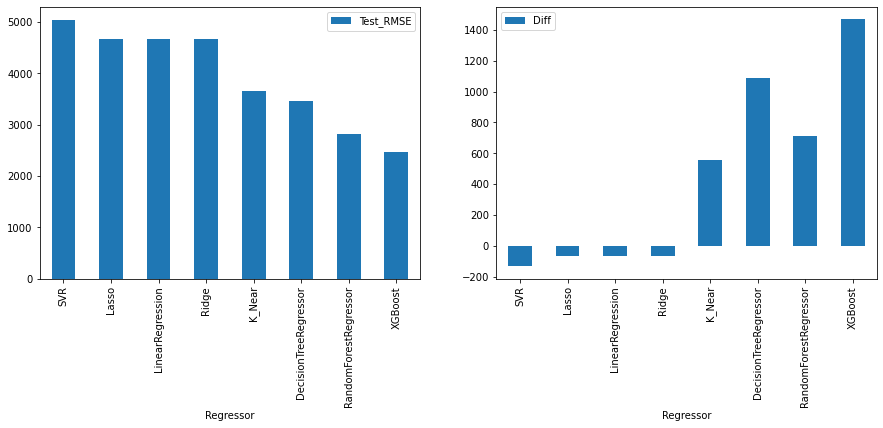

In [80]:
# Graph
fig, ax = plt.subplots(1,2, figsize =(15,5))
results.sort_values('Test_RMSE', ascending=False, inplace=True)
results.plot(y='Test_RMSE', kind='bar', ax=ax[0])
results.plot(y='Diff', kind='bar', ax=ax[1])

###### The above graph gives a pictorial view of the model performance and its R_squared

The model with the highest Test RMSE is the SVM, while the lowest is XGBoost. However, the K_nearest Neighbor Regression Model has the lowest difference between the Train and Test MSE while the XGBoost has the highest.

### Boosting the Best model

##### Using AdaBoostRegressor model we strenghthen, the xgboost regression model.

In [81]:
xgb = xgb.XGBRegressor()
bst_reg = AdaBoostRegressor(base_estimator = xgb)

In [82]:
bst_reg.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=XGBRegressor(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                

In [83]:
y_pred = bst_reg.predict(X_test)
train_pred = bst_reg.predict(X_train)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train_rmse", np.sqrt(mean_squared_error(y_train, train_pred)))
print("r2", r2_score(y_test, y_pred))

RMSE:  2258.334675914244
Train_rmse 611.2965738129824
r2 0.8045959365777804


Let us see how the models perform on the Kaggle Competition

### Kaggle Submissions

In [84]:
#Loading the test data set and display the first five rows

df_test = pd.read_csv('df_test.csv', index_col=0)
df_test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [85]:
#Check that the data type matches the column

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 8763 to 11682
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  2920 non-null   object 
 1   Madrid_wind_speed     2920 non-null   float64
 2   Valencia_wind_deg     2920 non-null   object 
 3   Bilbao_rain_1h        2920 non-null   float64
 4   Valencia_wind_speed   2920 non-null   float64
 5   Seville_humidity      2920 non-null   float64
 6   Madrid_humidity       2920 non-null   float64
 7   Bilbao_clouds_all     2920 non-null   float64
 8   Bilbao_wind_speed     2920 non-null   float64
 9   Seville_clouds_all    2920 non-null   float64
 10  Bilbao_wind_deg       2920 non-null   float64
 11  Barcelona_wind_speed  2920 non-null   float64
 12  Barcelona_wind_deg    2920 non-null   float64
 13  Madrid_clouds_all     2920 non-null   float64
 14  Seville_wind_speed    2920 non-null   float64
 15  Barcelona_rain_1h

###### Checking for Missing values in the Test Dataset

In [86]:
#Check for nulls in the dataset

df_test.isna().sum()

time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp              0
Valencia_humidity   

###### Filling the Missing dataset with the average value

In [87]:
#Fill the null values in the Valencia Pressure table with the mean

df_test = df_test.fillna(df['Valencia_pressure'].mean())

###### Creating temporal features in the Test dataset

In [88]:
#Convert time column from object to date time and create temporal features

df_test['time'] = pd.to_datetime(df_test['time'])
df_test['year'] = pd.to_datetime(df_test['time']).dt.year
df_test['month_of_year'] = pd.to_datetime(df_test['time']).dt.month
df_test['week_of_year'] = df_test['time'].dt.isocalendar().week.astype(int)
df_test['day_of_month'] = pd.DatetimeIndex(df_test['time']).day
df_test['day_of_week'] = pd.DatetimeIndex(df_test['time']).dayofweek
df_test['day_of_year'] = pd.DatetimeIndex(df_test['time']).dayofyear
df_test['hour_of_day'] = pd.DatetimeIndex(df_test['time']).hour
df_test['hour_of_the_week'] = df_test['day_of_week'] * 24 + (df_test['hour_of_day'] + 1)
df_test['hour_of_year'] = df_test['day_of_year'] * 24 + df_test['hour_of_day']
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 8763 to 11682
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  2920 non-null   datetime64[ns]
 1   Madrid_wind_speed     2920 non-null   float64       
 2   Valencia_wind_deg     2920 non-null   object        
 3   Bilbao_rain_1h        2920 non-null   float64       
 4   Valencia_wind_speed   2920 non-null   float64       
 5   Seville_humidity      2920 non-null   float64       
 6   Madrid_humidity       2920 non-null   float64       
 7   Bilbao_clouds_all     2920 non-null   float64       
 8   Bilbao_wind_speed     2920 non-null   float64       
 9   Seville_clouds_all    2920 non-null   float64       
 10  Bilbao_wind_deg       2920 non-null   float64       
 11  Barcelona_wind_speed  2920 non-null   float64       
 12  Barcelona_wind_deg    2920 non-null   float64       
 13  Madrid_clouds_

###### Converting the Categorical columns to Numerical colunms

In [89]:
#Get dummy variables for the categorical columns

#Valencia Categorical Columns
df_test["Valencia_wind_deg"] = df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test["Valencia_wind_deg"] = pd.to_numeric(df_test["Valencia_wind_deg"])

#Seville Categorical Column
df_test["Seville_pressure"] = df_test['Seville_pressure'].str.extract('(\d+)')
df_test["Seville_pressure"] = pd.to_numeric(df_test["Seville_pressure"])

###### Removing the Time Columns

In [90]:
''' Since the base model does not use time to predict
    the load shortfall, we store it in a new variable
    time. The time variable will be inserted in the final
    submission file, as per the requirements
'''

time = df_test['time']
df_test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month_of_year,week_of_year,day_of_month,day_of_week,day_of_year,hour_of_day,hour_of_the_week,hour_of_year
8763,2018-01-01 00:00:00,5.000000,8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,1012.051407,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,2018,1,1,1,0,1,0,1,24
8764,2018-01-01 03:00:00,4.666667,8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,1012.051407,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,2018,1,1,1,0,1,3,4,27
8765,2018-01-01 06:00:00,2.333333,7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,1012.051407,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,2018,1,1,1,0,1,6,7,30
8766,2018-01-01 09:00:00,2.666667,7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,1012.051407,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,2018,1,1,1,0,1,9,10,33
8767,2018-01-01 12:00:00,4.000000,7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,1012.051407,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,2018,1,1,1,0,1,12,13,36


In [91]:
#Remove time from the data set and store the new dataframe in test_data
test_names = list(df_test.columns)
test_names.remove('time')
test_data = df_test[test_names]
test_data.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month_of_year,week_of_year,day_of_month,day_of_week,day_of_year,hour_of_day,hour_of_the_week,hour_of_year
8763,5.000000,8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,1012.051407,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,2018,1,1,1,0,1,0,1,24
8764,4.666667,8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,1012.051407,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,2018,1,1,1,0,1,3,4,27
8765,2.333333,7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,1012.051407,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,2018,1,1,1,0,1,6,7,30
8766,2.666667,7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,1012.051407,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,2018,1,1,1,0,1,9,10,33
8767,4.000000,7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,1012.051407,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,2018,1,1,1,0,1,12,13,36


###### Selecting the Best 34 columns using the K_best Mutual selector

In [92]:
XTest_data = test_data[test_data.columns[selector.get_support()]]
XTest_data.head()

,Valencia_wind_deg,Bilbao_rain_1h,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_deg,Seville_pressure,Bilbao_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month_of_year,week_of_year,day_of_month,day_of_week,day_of_year,hour_of_day,hour_of_the_week,hour_of_year
8763,8,0.0,87.000000,71.333333,20.000000,193.333333,25,1025.666667,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,2018,1,1,1,0,1,0,1,24
8764,8,0.0,89.000000,78.000000,0.000000,143.333333,25,1026.666667,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,2018,1,1,1,0,1,3,4,27
8765,7,0.0,89.000000,89.666667,0.000000,130.000000,25,1025.333333,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,2018,1,1,1,0,1,6,7,30
8766,7,0.0,93.333333,82.666667,26.666667,196.666667,25,1025.000000,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,2018,1,1,1,0,1,9,10,33
8767,7,0.0,65.333333,64.000000,26.666667,233.333333,25,1022.333333,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,2018,1,1,1,0,1,12,13,36


###### Standardizing the test data

In [93]:
#Standardize our data

# create scaler object
scaler = StandardScaler()
# create scaled version of the predictors (there is no need to scale the response)
scaled = scaler.fit_transform(XTest_data)
# convert the scaled predictor values into a dataframe
x_test = pd.DataFrame(scaled,columns=XTest_data.columns)
x_test.head()

,Valencia_wind_deg,Bilbao_rain_1h,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_deg,Seville_pressure,Bilbao_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month_of_year,week_of_year,day_of_month,day_of_week,day_of_year,hour_of_day,hour_of_the_week,hour_of_year
0,0.703345,-0.440268,0.964514,0.360022,-0.766227,0.314013,2.079927,1.021118,-0.944893,1.429950,-0.560781,-0.547588,0.602769,-0.914192,-0.534281,-0.404758,-0.888160,-0.358886,-1.289378,-0.946256,-0.322082,-0.535933,-0.885760,-0.891613,-0.855293,0.0,-1.602745,-1.690057,-1.673503,-1.493348,-1.727312,-1.527525,-1.694498,-1.731458
1,0.703345,-0.440268,1.061565,0.636255,-1.422372,-0.197584,2.079927,1.135113,-1.210834,1.464591,-1.033310,-1.016278,-0.151153,-1.172696,-0.998810,-0.826558,-0.924838,-0.803756,-1.044362,-0.849202,-0.787188,-0.696698,-1.138747,-0.966628,-0.969818,0.0,-1.602745,-1.690057,-1.673503,-1.493348,-1.727312,-1.091089,-1.632732,-1.730271
2,0.337515,-0.440268,1.061565,1.119662,-1.422372,-0.334010,2.079927,0.983120,-1.432451,1.499233,-1.222321,-1.203754,0.593345,-1.309704,-1.184621,-0.873425,-1.364972,-0.949861,-1.191372,-1.128553,-1.019741,-1.018228,-1.223075,-1.284514,-1.198870,0.0,-1.602745,-1.690057,-1.673503,-1.493348,-1.727312,-0.654654,-1.570966,-1.729085
3,0.337515,-0.440268,1.271842,0.829617,-0.547512,0.348120,2.079927,0.945121,-1.388128,1.672439,-1.127816,-1.110016,0.605911,-1.397164,-1.091715,-0.920291,-1.291616,-0.944241,-0.848348,-0.736743,-0.973231,-0.643109,-1.391733,-1.327592,-1.389746,0.0,-1.602745,-1.690057,-1.673503,-1.493348,-1.727312,-0.218218,-1.509200,-1.727899
4,0.337515,-0.440268,-0.086869,0.056166,-0.547512,0.723291,2.079927,0.641133,-0.590304,1.672439,-0.608034,-0.594457,0.605911,-0.669043,-0.580733,-0.451625,-0.851482,-0.434748,-0.456322,-0.370608,-0.415103,-0.267991,-0.717102,-0.800258,-0.740767,0.0,-1.602745,-1.690057,-1.673503,-1.493348,-1.727312,0.218218,-1.447435,-1.726712


In [94]:
col_list = ["day_of_month", "hour_of_day", "hour_of_the_week", "hour_of_year", "week_of_year", "day_of_week", "day_of_year"]

###### Re_indexing the test dataset to fit the desired format of the train dataset.

In [95]:
column_titles = [col for col in x_test.columns if col not in col_list] + ['hour_of_day'] + ["week_of_year"] + ["day_of_week"] + ['day_of_month'] + ["day_of_year"] + ["hour_of_the_week"] + ["hour_of_year"]
x_test = x_test.reindex(columns=column_titles)

##### Boosted XgBoost Model

In [96]:
y_pred = bst_reg.predict(x_test)

In [97]:
sub_time = df_test['time'].to_list()
load_shortfall_3h = y_pred.tolist()
list_of_tuples = list(zip(sub_time, load_shortfall_3h))
submission_df = pd.DataFrame(list_of_tuples,
                  columns = ['time', 'load_shortfall_3h'])

In [98]:
#Set the index to time
submission_df.set_index('time', inplace=True)

In [99]:
#Export the dataframe to csv
submission_df.to_csv('Final_Submission.csv')

This submission scored an RMSE of 3620

##### Linear Regression submission

In [100]:
#The predictions are made using lm2
test_pred = models['LinearRegression'].predict(x_test)

In [101]:
#Convert the time variable to a list
sub_time = df_test['time'].to_list()

In [102]:
#Convert the predictions to a list
sub_load = test_pred.tolist()

In [103]:
#Zip the time and predictions
list_of_tuples = list(zip(sub_time, sub_load))

In [104]:
#Create a  dataframe for submission
submission_df = pd.DataFrame(list_of_tuples,
                  columns = ['time', 'load_shortfall_3h'])

In [105]:
#View the dataframe
submission_df.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9777.520412
1,2018-01-01 03:00:00,9938.371022
2,2018-01-01 06:00:00,10891.165552
3,2018-01-01 09:00:00,10222.988506
4,2018-01-01 12:00:00,10819.834457


In [106]:
#Set the index to time
submission_df.set_index('time', inplace=True)

In [107]:
#Export the dataframe to csv
submission_df.to_csv('Second_Submission.csv')
#This submission yielded a score of 4685

This submission yielded a score of 4685

##### Ridge Regression submission

In [108]:
['LinearRegression', 'Ridge', 'Lasso', 'DecisionTreeRegressor', 'SVR', 'RandomForestRegressor', 
        'XGBoost', 'K_Near']

['LinearRegression',
 'Ridge',
 'Lasso',
 'DecisionTreeRegressor',
 'SVR',
 'RandomForestRegressor',
 'XGBoost',
 'K_Near']

In [109]:
test_ridge = models['Ridge'].predict(x_test)

In [110]:
ridge_load = test_ridge.tolist()

In [111]:
ridge_of_tuples = list(zip(sub_time, ridge_load))

In [112]:
ridge_df = pd.DataFrame(ridge_of_tuples,
                  columns = ['time', 'load_shortfall_3h'])
ridge_df.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9626.495500
1,2018-01-01 03:00:00,9804.570961
2,2018-01-01 06:00:00,10723.487352
3,2018-01-01 09:00:00,10108.430659
4,2018-01-01 12:00:00,10659.881861


In [113]:
ridge_df.set_index('time', inplace=True)
ridge_df.to_csv('Ridge_Submission.csv')

This submission scored an RMSE 4999

##### Lasso Regression Submission

In [114]:
test_lasso = models["Lasso"].predict(x_test)

In [115]:
lasso_load = test_lasso.tolist()
lasso_of_tuples = list(zip(sub_time, lasso_load))
lasso_df = pd.DataFrame(lasso_of_tuples,
                  columns = ['time', 'load_shortfall_3h'])
lasso_df.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9678.331638
1,2018-01-01 03:00:00,9878.666938
2,2018-01-01 06:00:00,10807.516155
3,2018-01-01 09:00:00,10195.681520
4,2018-01-01 12:00:00,10692.817258


In [116]:
lasso_df.set_index('time', inplace=True)
lasso_df.to_csv('Lasso_Submission.csv')



This submission yielded an RMSE score of 4509

##### Decision Tree Submission

In [117]:
test_tree = models['DecisionTreeRegressor'].predict(x_test)

In [118]:
tree_load = test_tree.tolist()
tree_of_tuples = list(zip(sub_time, tree_load))
tree_df = pd.DataFrame(tree_of_tuples,
                  columns = ['time', 'load_shortfall_3h'])
tree_df.head(20)

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9761.000000
1,2018-01-01 03:00:00,1821.666667
2,2018-01-01 06:00:00,1821.666667
3,2018-01-01 09:00:00,-1794.333333
4,2018-01-01 12:00:00,-633.000000
5,2018-01-01 15:00:00,-537.333333
6,2018-01-01 18:00:00,7996.844444
7,2018-01-01 21:00:00,7996.844444
8,2018-01-02 00:00:00,4407.708333
9,2018-01-02 03:00:00,261.875969


In [119]:
tree_df.set_index('time', inplace=True)
tree_df.to_csv('Decision_Tree_Submission.csv')

This model was not submitted because the predicted values are very different from the trend of the training y-values

##### SVM Submission

In [120]:
test_svm_sub = models['SVR'].predict(x_test)

In [121]:
svm_load = test_svm_sub.tolist()
svm_of_tuples = list(zip(sub_time, svm_load))
svm_df = pd.DataFrame(svm_of_tuples,
                  columns = ['time', 'load_shortfall_3h'])
svm_df.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10756.122647
1,2018-01-01 03:00:00,10717.460642
2,2018-01-01 06:00:00,10703.244817
3,2018-01-01 09:00:00,10696.051179
4,2018-01-01 12:00:00,10832.908471


In [122]:
svm_df.set_index('time', inplace=True)
svm_df.to_csv('SVM_Submission.csv')



This yielded a RMSE score of 4834

##### Random Forest Submission

In [123]:
test_RF = models["RandomForestRegressor"].predict(x_test)

In [124]:
RF_load = test_RF.tolist()
RF_of_tuples = list(zip(sub_time, RF_load))
RF_df = pd.DataFrame(RF_of_tuples,
                  columns = ['time', 'load_shortfall_3h'])
RF_df.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,7473.767733
1,2018-01-01 03:00:00,2343.893174
2,2018-01-01 06:00:00,1916.591266
3,2018-01-01 09:00:00,3839.399846
4,2018-01-01 12:00:00,4195.983211


In [125]:
RF_df.set_index('time', inplace=True)
RF_df.to_csv('RF_Submission.csv')

This submission scored an RMSE of 5456

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

The best model thus far is the XGBoost Regression Model. It had the lowest RMSE in the Kaggle submission and the lowest RMSE amongst the models. In addition,it has the highest R_squared, it had the lowest difference between the train MSE and test MSE. This shows that it had a good balance between bias and variance

We can see from the Result of the RMSE (Root Mean Squared Error) that individualy most model alone is not sufficient to rely upon the resultd for just onw machine learning model.

XGBoost Regression Model is a gradiant boosting algorithm that makes predictions by reducing the recursive errors in the actual predictions.